In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

a = var("a")
b = var("b")

m = var("m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(a, "real")
assume(a > 0)
assume(b, "real")
assume(b > 0)

assume(m, "real")
assume(m >= 0)

#Propulsion and Energy Forum
#July 28-30, 2014, Cleveland, OH
#50th AIAA/ASME/SAE/ASEE Joint Propulsion Conference
#Anomalous Thrust Production from an RF Test Device
#Measured on a Low-Thrust Torsion Pendulum
#David A. Brady * , Harold G. White † , Paul March ‡ , James T. Lawrence § , and Frank J. Davies **
#NASA Lyndon B. Johnson Space Center, Houston, Texas 77058


#Tapered Cavity RF Evaluation and Testing, TE012 mode
#Prior to the TM211 evaluations, COMSOL® analysis indicated that the TE012 was an effective thrust generation
#mode for the tapered cavity thruster being evaluated, so this mode was explored early in the evaluation process.
#Figure 22 shows a test run at the TE012 mode with an operating frequency of 1880.4 MHz. The measured quality
#factor was ~22,000, with a COMSOL prediction of 21,817. The measured power applied to the test article was
#measured to be 2.6 watts, and the (net) measured thrust was 55.4 micronewtons. With an input power of 2.6 watts,
#correcting for the quality factor, the predicted thrust is 50 micronewtons. However, since the TE012 mode had
#numerous other RF modes in very close proximity, it was impractical to repeatedly operate the system in this mode,
#so the decision was made to evaluate the TM211 modes instead.

#E. Tapered Cavity Testing: Summary of Results
# Mode 
# Frequency (MHz)
# Quality Factor, Q 

# Input Power (W) 
# Peak Thrust (μN) 
# Mean Thrust (μN) 
# Number of Test Runs
# TM211 1932.6   7320  16.9  116.0   91.2  5
# TM211 1936.7 18,100  16.7   54.1   50.1  2
# TE012 1880.4 22,000   2.6   55.4   55.4  1

# Harrington, Roger F. (1961). Time-Harmonic Electromagnetic Fields. McGraw-Hill. ISBN 9780070267459.

# EEE TRANSACTIONS ON MICROWAVE THEORY AND TECHNIQUES, VOL. 54, NO. 4, APRIL 2006
# Two-Resonator Method for Measurement of Dielectric Anisotropy in Multilayer SamplesPlamen I. Dankov, Member, IEEE
# https://www.researchgate.net/publication/3131333_Two-resonator_method_for_measurement_of_dielectric_anisotropy_in_multilayer_samples

m_val = 0
n_val = 0
h_val = 0

E_mode = True
n_layers = 2

a_val = 12

In [4]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
def find_newton_root(f,x,xn):
    df = f.diff(x)
    #print ("df", df)
    step = 1.0
    NewtonIt = lambda x, step : x-step*(f/df)(x)
    #xn=(a+b)/2;                      # initial guess

    #print (xn)
    for i in range(20):
        xn=N(NewtonIt(xn, step), digits=32)
        #print ("xn", xn)
        
        f_n = f(xn)
        #print ("f_n",f_n)
        step *= 0.9

    return xn

In [7]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001):
    try:
        free_variable = func.variables()[0]
    except:
        free_variable = x
    #print("free_variable", free_variable)
    #print("func", func(1))
    L = []
    if b - a < tol:
        return L
    try:
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        x0 = find_root(func,a,b)
        #exec("print(func(" + preparse(str(free_variable)) + "=x0))")
        #print ("x0 =", x0, func(free_variable=x0))
        L.append(x0)
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        if 'f appears to have no zero on the interval' != str(ex):
            print(str(ex))
            print ("a = ", a, "b = ", b)
            print (func(free_variable=a), func(free_variable=b))
            exec("print(func(" + preparse(str(free_variable)) + "=a))")
            exec("print(func(" + preparse(str(free_variable)) + "=b))")
        pass
    return L

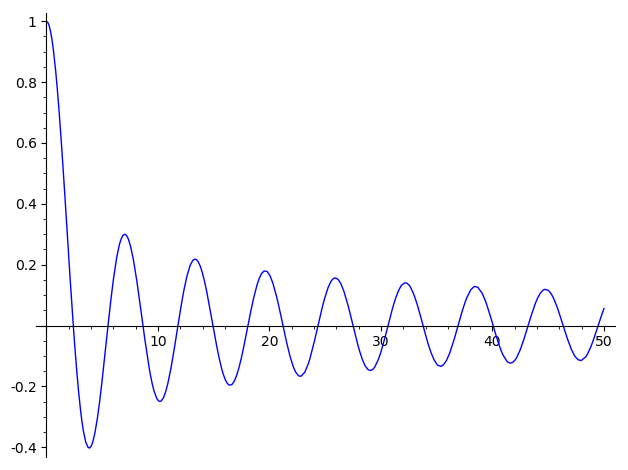

[2.404825557695772,
 5.520078110286311,
 8.653727912911013,
 11.791534439014281,
 14.930917708487819,
 18.071063967910924,
 21.21163662987927,
 24.352471530749302,
 27.493479132040253,
 30.634606468431976,
 33.77582021357357,
 36.917098353664045,
 40.0584257646282,
 43.19979171317673,
 46.34118837166201,
 49.48260989739783]

In [8]:
plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

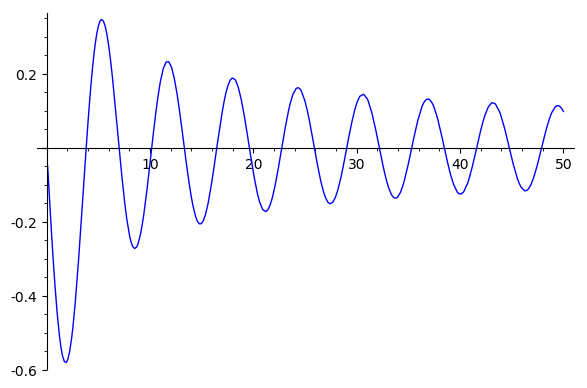

[3.831705970207552,
 7.015586669815619,
 10.173468135062722,
 13.323691936314223,
 16.470630050877634,
 19.615858510468243,
 22.760084380592772,
 25.90367208761827,
 29.046828534916855,
 32.189679910974405,
 35.33230755008384,
 38.474766234771614,
 41.61709421281445,
 44.75931899765282,
 47.90146088718542]

In [9]:
plot(bessel_J_d(m_val,x),0.1,50).show()
first_bessel_d_roots = find_root_recursive(bessel_J_d(m_val,x),0.1,50)
first_bessel_d_roots.sort()
first_bessel_d_roots

In [10]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("assume(mu_" + str(i) + " > 0)")
    exec("mu += [mu_" + str(i) +"]")

In [11]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("assume(epsilon_" + str(i) + ", 'real')")
    exec("assume(epsilon_" + str(i) + " > 0)")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [12]:
sigma = []
for i in range(n_layers):
    exec("sigma_" + str(i) + "= var('sigma_" + str(i) + "')")
    exec("assume(sigma_" + str(i) + ", 'real')")
    exec("assume(sigma_" + str(i) + " > 0)")
    exec("sigma += [sigma_" + str(i) +"]")

In [13]:
g = []
for i in range(n_layers):
    exec("g_" + str(i) + "= var('g_" + str(i) + "')")
    exec("assume(g_" + str(i) + ", 'real')")
    exec("assume(g_" + str(i) + " > 0)")
    exec("g += [g_" + str(i) +"]")

In [14]:
h = []
for i in range(n_layers):
    exec("h_" + str(i) + "= var('h_" + str(i) + "')")
    exec("assume(h_" + str(i) + ", 'real')")
    exec("assume(h_" + str(i) + " > 0)")
    exec("h += [h_" + str(i) +"]")

In [15]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [16]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [17]:
C_z = []
for i in range(n_layers):
    exec("C_z_" + str(i) + "= var('C_z_" + str(i) + "')")
    exec("assume(C_z_" + str(i) + ", 'real')")
    exec("C_z += [C_z_" + str(i) +"]")

In [18]:
D_z = []
for i in range(n_layers):
    exec("D_z_" + str(i) + "= var('D_z_" + str(i) + "')")
    exec("assume(D_z_" + str(i) + ", 'real')")
    exec("D_z += [D_z_" + str(i) +"]")

In [19]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

In [20]:
sigma_m = []
for i in range(2):
    exec("sigma_m" + str(i) + "= var('sigma_m" + str(i) + "')")
    exec("assume(sigma_m" + str(i) + ", 'real')")
    exec("assume(sigma_m" + str(i) + " > 0)")
    exec("sigma_m += [sigma_m" + str(i) +"]")

In [21]:
k_m = []
for i in range(2):
    exec("k_m" + str(i) + "= var('k_m" + str(i) + "')")
    exec("assume(k_m" + str(i) + ", 'real')")
    exec("k_m += [k_m" + str(i) +"]")

In [22]:
s_m = []
for i in range(2):
    exec("s_m" + str(i) + "= var('s_m" + str(i) + "')")
    exec("assume(s_m" + str(i) + ", 'real')")
    exec("s_m += [s_m" + str(i) +"]")

$\vec{E} = \vec{E}\,e^{-i\,\omega\,t}$

$\vec{H} = \vec{H}\,e^{-i\,\omega\,t}$


$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E} \right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\left(\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} + i\,\frac{4\pi\omega}{c^2} \sigma \right)\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

Ищем решение в виде

$E_{z}\left({\rho}, {\phi}, \mathit{z}\right) = E_{z}(\rho)\,E_{z}(\phi)\,E_{z}(z)$

$H_{z}\left({\rho}, {\phi}, \mathit{z}\right) = H_{z}(\rho)\,H_{z}(\phi)\,H_{z}(z)$


подставляя в исходное уравнение

In [23]:
# подставляя в исходное уравнение 
if True:
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    H = ES.vector_field(
        function('H_rho_rho')(rho) * function('H_rho_phi')(phi) * function('H_rho_z')(zz),
        function('H_phi_pho')(rho) * function('H_phi_phi')(phi) * function('H_phi_z')(zz),
        function('H_z_rho')  (rho) * function('H_z_phi')  (phi) * function('H_z_z')  (zz),
        name='H')

    E = ES.vector_field(
        function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
        function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
        function('E_z_rho')  (rho) * function('E_z_phi')  (phi) * function('E_z_z')  (zz),
        name='E')

    E = ES.vector_field(
        function('E_rho')(rho,phi,zz),
        function('E_phi')(rho,phi,zz),
        function('E_z')(rho,phi,zz),
        name='E')
    
    H = ES.vector_field(
        function('H_rho')(rho,phi,zz),
        function('H_phi')(rho,phi,zz),
        function('H_z')(rho,phi,zz),
        name='H')
    
    #E = ES.vector_field(
    #    function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
    #    function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
    #    function('E_z_rho')  (rho) * cos(m*phi) * e^(I*k[0]*zz),
    #    name='E')
    
    from sage.manifolds.operators import curl, laplacian
    rot_rot_E = curl(curl(E))
    rot_rot_H = curl(curl(H))
    laplacian_E = laplacian(E)
    laplacian_H = laplacian(H)

    #print (rot_rot_E.display())
    #print (rot_rot_H.display())
    #print (laplacian_E.display())
    
    #eq_z = (rot_rot_E[3] - mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand()
    #display(Math(latex(eq_z.expr())))
    
    eq_zE = (laplacian_E[3] + mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand().expr() == 0
    display(Math(latex(eq_zE)))
    
        
    eq_zH = (laplacian_H[3] + mu[0] * epsilon[0] * omega^2 / c^2 * H[3]).expand().expr() == 0
    display(Math(latex(eq_zH)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

we have 

$\frac{\epsilon \mu \omega^{2} E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right) + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)$


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming

$E_{z}(\phi) = sin(m\,\varphi + \psi_{m})$

and

$E_{z}(z) = e^{i\,k\,z}$

or

$E_{z}(z) = cos\left(k\,z\right)$
or
$E_{z}(z) = sin\left(k\,z\right)$

приходим к обыкновенному дифференциальному уравнению


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

assuming

$\kappa^2 = \frac{\mu \, \epsilon \, \omega^2}{c^2} - k^2$

we will receive equation of Bessel type

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$


In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega}\,i$ we have

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming for metals

$E_{z}(z) = e^{i\,k'\,z}$

with complex $k' = k + i\,s$

$E_{z}(z) = e^{i\,k\,z} \, e^{-s\,z}$

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k'^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} - k'^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$k'^2 
= \left(k + i\,s \right)^2
= k^2 - s^2 + 2\,i\,k\,s$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2}
+\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2}
- k^2 + s^2 - 2\,i\,k\,s
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$- 2\,i\,k\,s +\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} = 0 $

$2\,k\,s = \frac{4\pi\,\mu\,\sigma\,\omega}{c^2}$

assuming now

$\kappa^2 = \frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2} - k^2 + s^2$

$s = \frac{2\pi\,\mu\,\sigma\,\omega}{k\,c^2}$

$\kappa^2 = \frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2} - k^2 + \left(\frac{2\pi\,\mu\,\sigma\,\omega}{k\,c^2}\right)^2$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

Dielectrics

assuming for dielectrics

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega'\,t}$

with complex $\omega' = \omega - i\,\alpha$

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega\,t} \, e^{-\alpha\,t}$

In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega'}\,i$ we have

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$



$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \, \omega'^2}{c^2} - k^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$\omega'^2 
= \left(\omega - i\,\alpha \right)^2
= \omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega'^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\omega'}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\omega - i\,\alpha \right)}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\alpha^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i = 0$

$2\pi\,\sigma = \epsilon_{\alpha\,\beta}\,\alpha$

$\alpha = \frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}$


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\alpha^2\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{2\,\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
+\frac{\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

assuming now

$
\kappa^2 = \frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

In [24]:
# исходя из вида дифференциальных уравнений для metal
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_metal = []
eq_s_metal = []
for i in range(2):
    eq_kappa_metal += [omega^2 / c^2 - k_m[i]^2 + s_m[i]^2 == kappa^2]
    eq_s_metal     += [4 * pi * sigma_m[i] * omega / c^2 == 2 * k_m[i] * s_m[i]]

display(Math(latex(eq_kappa_metal)))
display(Math(latex(eq_s_metal)))

eq_kappa_metal_s = []
for i in range(2):
    eq_kappa_metal_s += [eq_kappa_metal[i].subs(solve(eq_s_metal[i],s_m[i]))]

display(Math(latex(eq_kappa_metal_s)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [26]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_dielectric = []
for i in range(n_layers):
    eq_kappa_dielectric += [mu[i] * epsilon[i] / c^2 * (omega^2 + (2*pi*sigma[i]/epsilon[i])^2) - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa_dielectric)))

<IPython.core.display.Math object>

In [27]:
if True:
    i_layer = 0
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    kk = var("kk")
    assume(kk, "real")
    
    assume(rho, "real")
    assume(phi, "real")
    assume(zz, "real")
    
    E1 = ES.vector_field(
        function('E1_rho')(rho,phi) * e^(I*kk*zz),
        function('E1_phi')(rho,phi) * e^(I*kk*zz),
        function('E1_z')  (rho,phi) * e^(I*kk*zz),
        name='E1')
    
    H1 = ES.vector_field(
        function('H1_rho')(rho,phi) * e^(I*kk*zz),
        function('H1_phi')(rho,phi) * e^(I*kk*zz),
        function('H1_z')  (rho,phi) * e^(I*kk*zz),
        name='H1')
    
    from sage.manifolds.operators import curl, laplacian
    rot_E1 = curl(E1)
    rot_H1 = curl(H1)
    
    eq_rot_E1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_E1 += [ (I * omega * mu[i_layer] / c * H1[j].expr() == rot_E1[j].expr()).expand() ]
    display(Math(latex(eq_rot_E1)))
    
    eq_rot_H1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_H1 += [ (- I * omega / c * epsilon[i_layer] * E1[j].expr() == rot_H1[j].expr()).expand() ]
    display(Math(latex(eq_rot_H1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
E_phi_sol_1 = solve(eq_rot_E1[0], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_1)))
E_phi_sol_2 = solve(eq_rot_H1[1], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_2)))

In [29]:
H_rho_sol_1 = solve(eq_rot_E1[0], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_1)))
H_rho_sol_2 = solve(eq_rot_H1[1], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_2)))

In [30]:
E_phi_solution = solve(E_phi_sol_1[0].subs(H_rho_sol_2),function('E1_phi')(rho,phi) )
#display(Math(latex(E_phi_sol)))
E_phi_solution = solve(E_phi_sol_2[0].subs(H_rho_sol_1),function('E1_phi')(rho,phi) )
display(Math(latex(E_phi_solution)))

<IPython.core.display.Math object>

In [31]:
H_rho_solution = solve(H_rho_sol_1[0].subs(E_phi_sol_2),function('H1_rho')(rho,phi) )
#display(Math(latex(H_rho_sol)))
H_rho_solution = solve(H_rho_sol_2[0].subs(E_phi_sol_1),function('H1_rho')(rho,phi) )
display(Math(latex(H_rho_solution)))

<IPython.core.display.Math object>

In [32]:
E_rho_sol_1 = solve(eq_rot_E1[1], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_1)))
E_rho_sol_2 = solve(eq_rot_H1[0], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_2)))

In [33]:
H_phi_sol_1 = solve(eq_rot_E1[1], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_1)))
H_phi_sol_2 = solve(eq_rot_H1[0], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_2)))

In [34]:
E_rho_solution = solve(E_rho_sol_1[0].subs(H_phi_sol_2),function('E1_rho')(rho,phi) )
#display(Math(latex(E_rho_sol)))
E_rho_solution = solve(E_rho_sol_2[0].subs(H_phi_sol_1),function('E1_rho')(rho,phi) )
display(Math(latex(E_rho_solution)))

<IPython.core.display.Math object>

In [35]:
H_phi_solution = solve(H_phi_sol_1[0].subs(E_rho_sol_2),function('H1_phi')(rho,phi) )
#display(Math(latex(H_phi_sol)))
H_phi_solution = solve(H_phi_sol_2[0].subs(E_rho_sol_1),function('H1_phi')(rho,phi) )
display(Math(latex(H_phi_solution)))

<IPython.core.display.Math object>

In [36]:
H_z = []
H_z_a = [] # sin(k[i]*z) = imag_part()
H_z_b = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        H_z += [lambda rh,ph,z, i=i : 0]
        H_z_a += [lambda rh,ph,z, i=i : 0]
        H_z_b += [lambda rh,ph,z, i=i : 0]
        pass
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph)]
        H_z_a += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        H_z_b += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(B_z[i]*e^(I*k[i]*z)) * cos(m*ph)]

In [37]:
E_z = [] 
E_z_c = [] # sin(k[i]*z) = imag_part()
E_z_d = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*sin(k[i]*z) + D_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_z_c += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        E_z_d += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( D_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]
        E_z_c += [lambda rh,ph,z, i=i: 0]
        E_z_d += [lambda rh,ph,z, i=i: 0]
        pass

In [38]:
var("B")*(e^(I * kk * z)).real_part()

B*cos(kk*z)

In [39]:
# + pi/2
var("B")*(I*e^(I * kk * z)).real_part()

-B*sin(kk*z)

In [40]:
# - pi/2
var("B")*(-I*e^(I * kk * z)).real_part()

B*sin(kk*z)

In [41]:
var("A")*(e^(I * kk * z)).imag_part()

A*sin(kk*z)

In [42]:
# + pi/2
var("A")*(I*e^(I * kk * z)).imag_part()

A*cos(kk*z)

In [43]:
# - pi/2
var("A")*(-I*e^(I * kk * z)).imag_part()

-A*cos(kk*z)

In [44]:
def make_field_formula_old(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('H1_z(rho, phi)', 'H_z[i](rh,ph,z)') \
            .replace('E1_z(rho, phi)', 'E_z[i](rh,ph,z)') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]')
    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print(s)
    #print(i, i_layer)
    f = []
    exec("f += [" + preparse(s) + "]")
    #print(f)
    s = str_replacing(str(f[0]), i, i_layer)
    return s

In [45]:
def expand_re_im_operands(s, expand_real_operands, expand_imag_operands):
    from sage.symbolic.operators import add_vararg, mul_vararg
    s_factor = s.factor()
    #print("s_factor", s_factor)
    s_factor_operator = s_factor.operator()
    #print("s_factor.operator()", s_factor_operator)
    if mul_vararg != s_factor_operator:
        print("mul_vararg != s_factor.operator()", s_factor_operator)
        print("re_im(v_expanded)", v_expanded)
        raise ("mul_vararg != s_factor.operator()", s_factor_operator)

    current_s_has_image_part = False
    current_s_has_exp_of_image_part = False

    s_factor_real_operands = ()
    s_factor_imag_operands = ()
    s_factor_complex_exp_operands = ()
    for m in s_factor.operands():
        #print("operand", m, m.operator())
        if bessel_J == m.operator():
            #print("bessel_J == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (m,)
        elif 'bessel_j' == str(m.operator()):
            #print("bessel_j == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (bessel_J(*m.operands()),)
        elif exp == m.operator():
            #print("exp == m.operator() m.operands():",m, m.operands())
            current_exp_has_image_part = False
            for m_operand in m.operands():
                #print("m_operand", m_operand)
                m_operand_imag_part = m_operand.imag_part()
                #print("m_operand_imag_part", m_operand_imag_part)
                #print("type(m_operand_imag_part)", type(m_operand_imag_part))
                #print("type(0)", type(0))
                m_operand_imag_part_is_0 = 0 is m_operand_imag_part
                #print("m_operand_imag_part_is_0", m_operand_imag_part_is_0)
                m_operand_imag_part_eq_0 = 0 == m_operand_imag_part
                bool_m_operand_imag_part_eq_0 = bool(m_operand_imag_part_eq_0)
                #print("m_operand_imag_part_eq_0", m_operand_imag_part_eq_0)
                #print("type(m_operand_imag_part_eq_0)", type(m_operand_imag_part_eq_0))
                if False == bool_m_operand_imag_part_eq_0:
                    #print("current_s_has_exp_of_image_part")
                    current_s_has_exp_of_image_part = True
                    current_exp_has_image_part = True
            if True == current_exp_has_image_part:
                #print("True == current_exp_has_image_part")
                s_factor_complex_exp_operands += (m,)
            else:
                #print("not True == current_exp_has_image_part")
                s_factor_real_operands += (m,)
        else:
            #print("not bessel, not exp", m)
            m_imag_part = m.imag_part()
            #print("m_imag_part", m_imag_part)
            #print("type(m_imag_part)", type(m_imag_part))
            #print("type(0)", type(0))
            m_imag_part_is_0 = 0 is m_imag_part
            #print("m_imag_part_is_0", m_imag_part_is_0)
            m_imag_part_eq_0 = 0 == m_imag_part
            bool_m_imag_part_eq_0 = bool(m_imag_part_eq_0)
            #print("m_imag_part_eq_0", m_imag_part_eq_0)
            #print("bool(m_imag_part_eq_0)", bool(m_imag_part_eq_0))
            #print("type(m_imag_part_eq_0)", type(m_imag_part_eq_0))
            if False == bool_m_imag_part_eq_0:
                #print("current_s_has_image_part = True")
                current_s_has_image_part = True
                s_factor_imag_operands += (I,)
                s_factor_real_operands += (m/I,)
            else:
                #print("not current_s_has_image_part = True")
                s_factor_real_operands += (m,)

    if True == current_s_has_exp_of_image_part:
        #print("current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul_complex_exp = mul_vararg(*(s_factor_imag_operands + s_factor_complex_exp_operands))
            re_out = mul_vararg(*((imag_part_mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((imag_part_mul_complex_exp.imag_part(),) + s_factor_real_operands))
        else:
            #print("not True == current_s_has_image_part")
            mul_complex_exp = mul_vararg(*(s_factor_complex_exp_operands))
            re_out = mul_vararg(*((mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((mul_complex_exp.imag_part(),) + s_factor_real_operands))
    else:
        #print("not current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul = mul_vararg(*(s_factor_imag_operands))
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            #print("imag_part_mul", imag_part_mul)
            #print("real_part_mul", real_part_mul)
            re_out = 0
            im_out = (imag_part_mul/I) * real_part_mul
        else:
            #print("not True == current_s_has_image_part")
            im_out = 0
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            re_out = real_part_mul
    #print("re_out", re_out)
    #print("im_out", im_out)
    expand_real_operands += (re_out,)
    expand_imag_operands += (im_out,)
    
    return (expand_real_operands, expand_imag_operands)


def re_im(v_expanded):
    from sage.symbolic.operators import add_vararg, mul_vararg
    expand_real_operands = ()
    expand_imag_operands = ()    
    if add_vararg == v_expanded.operator():
        for s in v_expanded.operands():
            (expand_real_operands, expand_imag_operands) = expand_re_im_operands(s, expand_real_operands, expand_imag_operands)
    elif mul_vararg == v_expanded.operator():
        (expand_real_operands, expand_imag_operands) = expand_re_im_operands(v_expanded, expand_real_operands, expand_imag_operands)
    else:
        print("add_vararg, mul_vararg != v_expanded.operator()", v_expanded.operator())
        print("re_im(v_expanded)", v_expanded)
        return (v_expanded.real_part(), v_expanded.imag_part())

    if 0 == len(expand_real_operands) and  0 == len(expand_imag_operands):
        return (0, 0)
    if 0 == len(expand_real_operands) and  0 != len(expand_imag_operands):
        return (0, (add_vararg(*expand_imag_operands)).factor())
    if 0 != len(expand_real_operands) and  0 == len(expand_imag_operands):
        return ((add_vararg(*expand_real_operands)).factor(), 0)
    return ((add_vararg(*expand_real_operands)), (add_vararg(*expand_imag_operands)))

def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v
    #return v.real_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return re

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0
    #return v.imag_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return im

In [46]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [47]:
def make_field_formula(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]') \
            .replace('bessel_j', 'bessel_J')

    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print("s =", s)
    
    s_im = s \
        .replace('H1_z(rh, ph)', 'H_z_a[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_c[i](rh,ph,z)')
    s_re = s \
        .replace('H1_z(rh, ph)', 'H_z_b[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_d[i](rh,ph,z)')
    s_all = s \
        .replace('H1_z(rh, ph)', 'H_z[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z[i](rh,ph,z)')
    #print("s_im =", s_im)
    #print("s_re =", s_re)
    #print("s_all =", s_all)
    #print(s)
    #print(i, i_layer)
    f_Im = []
    f_Re = []
    f_im = []
    f_re = []
    f = []
    exec("f_im += [" + preparse("(" + s_im + ").imag_part()") + "]")
    exec("f_re += [" + preparse("(" + s_re + ").real_part()") + "]")
    exec("f_Im += [" + Preparse("Im(" + s_im + ")") + "]")
    exec("f_Re += [" + Preparse("Re(" + s_re + ")") + "]")
    exec("f += [" + Preparse(s_all) + "]")
    #print(f)
    s1 = str_replacing(str(f[0]), i, i_layer)
    s2 = str_replacing(str((f_im[0]+f_re[0]).factor()), i, i_layer)
    s3 = str_replacing(str((f_Im[0]+f_Re[0]).factor()), i, i_layer)
    return (s1, s2, s3)

In [48]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_rho_solution, i, i_layer)
    print("")
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    print(bessel_J_d(m,kappa*rh))


-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)

-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)


In [49]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_phi_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

-I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)



In [50]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_rho_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)



In [51]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_phi_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)



In [52]:
r = var('r') #rho
p = var('p') #phi
assume(r, "real")
assume(r > 0)
assume(p, "real")

In [53]:
E_rh = []
for i in range(n_layers):
    if E_mode:
        #E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_rh += [lambda r,p,z, i=i: -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa]
    else:
        #E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(c*kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*cos(k[i]*z) - A_z[i]*sin(k[i]*z)) * sin(m*ph)]
        E_rh += [lambda r,p,z, i=i : -I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]

In [54]:
E_ph = []
for i in range(n_layers):
    if E_mode:
        #E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * sin(m*ph)]
        E_ph += [lambda r,p,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)]
    else:
        # E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*rh)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # 1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        E_ph += [lambda r,p,z, i=i : - I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*r)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*p)]


In [55]:
E_z = []
for i in range(n_layers):
    if E_mode:
        E_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*p)]
    else:
        E_z += [lambda r,p,z, i=i: 0]

In [56]:
H_rh = []
for i in range(n_layers):
    if E_mode:
        #H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*cos(k[i]*z) - C_z[i]*sin(k[i]*z)) * sin(m*ph)]
        H_rh += [lambda r,p,z, i=i : I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]
    else:
        H_rh += [lambda r,p,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*r)*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*p)]
        # -1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

In [57]:
H_ph = []
for i in range(n_layers):
    if E_mode:
        #H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        H_ph += [lambda r,p,z, i=i : -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)]
    else:
        #H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*sin(k[i]*z) + A_z[i]*cos(k[i]*z)) * sin(m*ph)]
        # -(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)
        H_ph += [lambda r,p,z, i=i: m*k[i]/(kappa^2*r) * bessel_J  (m,kappa*r)*(B_z[i]*sin(k[i]*z) - A_z[i]*cos(k[i]*z)) * sin(m*p)]
        

In [58]:
H_z = []
for i in range(n_layers):
    if E_mode:
        H_z += [lambda r,p,z, i=i : 0]
    else:
        H_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*p)]

In [59]:
Em_rh = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * cos(m*ph)]
        Em_rh += [lambda r,p,z, j=j: -1/2*(C_z[i]*cos(k_m[j]*z) - D_z[i]*sin(k_m[j]*z))*k_m[j]*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa]
    else:
        #E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(c*kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*cos(k[i]*z) - A_z[i]*sin(k[i]*z)) * sin(m*ph)]
        Em_rh += [lambda r,p,z, j=j : -I*(B_z[i]*cos(k_m[j]*z) + A_z[i]*sin(k_m[j]*z))*m*mu[i]*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]

In [60]:
Em_ph = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * sin(m*ph)]
        Em_ph += [lambda r,p,z, j=j: -(C_z[i]*cos(k_m[i]*z) - D_z[i]*sin(k_m[i]*z))*k_m[i]*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)]
    else:
        # E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*rh)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # 1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        Em_ph += [lambda r,p,z, j=j : - I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*r)*( B_z[i]*cos(k_m[i]*z) + A_z[i]*sin(k_m[i]*z)) * cos(m*p)]


In [61]:
Em_z = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        Em_z += [lambda r,p,z, j=j: bessel_J(m,kappa*r)*( D_z[i]*cos(k_m[i]*z) + C_z[i]*sin(k_m[i]*z)) * cos(m*p)]
    else:
        Em_z += [lambda r,p,z, j=j: 0]

In [62]:
Hm_rh = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*cos(k[i]*z) - C_z[i]*sin(k[i]*z)) * sin(m*ph)]
        Hm_rh += [lambda r,p,z, j=j : I*(D_z[i]*cos(k_m[j]*z) + C_z[i]*sin(k_m[j]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]
    else:
        Hm_rh += [lambda r,p,z, j=j: k_m[j]/kappa * bessel_J_d(m,kappa*r)*(A_z[i]*cos(k_m[j]*z) - B_z[i]*sin(k_m[j]*z)) * cos(m*p)]
        # -1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

In [63]:
Hm_ph = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        Hm_ph += [lambda r,p,z, j=j : -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)]
    else:
        #H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*sin(k[i]*z) + A_z[i]*cos(k[i]*z)) * sin(m*ph)]
        # -(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)
        Hm_ph += [lambda r,p,z, j=j: m*k_m[j]/(kappa^2*r) * bessel_J  (m,kappa*r)*(B_z[i]*sin(k_m[j]*z) - A_z[i]*cos(k_m[j]*z)) * sin(m*p)]
        

In [64]:
Hm_z = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        Hm_z += [lambda r,p,z, j=j : 0]
    else:
        Hm_z += [lambda r,p,z, j=j: bessel_J(m,kappa*r)*(A_z[i]*sin(k_m[j]*z) + B_z[i]*cos(k_m[i]*z)) * cos(m*p)]

In [65]:
E_rh[0](r,p,z)

-1/2*(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa

In [66]:
E_ph[0](r,p,z)

-(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)

In [67]:
if 1 < n_layers:
    E_rh[1](rh,ph,z)

In [68]:
if 1 < n_layers:
    E_ph[1](rh,ph,z)

In [69]:
E_z[0](rh,ph,z)

(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*cos(m*varphi)

In [70]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [71]:
make_test_with_maxwell_equations = True

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \left( \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

In [72]:
def test_with_maxwell_equations(i_layer):
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E0 = ES.vector_field(
        E_rh[i_layer](rho,phi,zz),
        E_ph[i_layer](rho,phi,zz),
        E_z[i_layer](rho,phi,zz),
        name='E0')

    H0 = ES.vector_field(
        H_rh[i_layer](rho,phi,zz),
        H_ph[i_layer](rho,phi,zz),
        H_z[i_layer](rho,phi,zz),
        name='H0')

    from sage.manifolds.operators import curl, laplacian
    rot_E0 = curl(E0)
    print("rot_E0 =")#, rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_E0[j].expr())))
        #display(Math(latex(mu[i_layer] * I * omega / c * H0[j].expr())))
        print("")
    
    rot_H0 = curl(H0)
    print("rot_H0 =", rot_H0.display())
    print("")
    
    rot_rot_E0 = curl(rot_E0)
    print("rot_rot_E0 =", rot_rot_E0.display())
    print("")
    
    rot_rot_H0 = curl(rot_H0)
    print("rot_rot_H0 =", rot_rot_H0.display())
    print("")

    laplacian_E0 = laplacian(E0)
    print("laplacian_E0 =", laplacian_E0.display())
    print("")

    
    mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * E0
    mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
    
    print("mu_epsilon_omega2_c2_E0 =", mu_epsilon_omega2_c2_E0.display())
    print("")
    print("mu_epsilon_omega2_c2_H0 =", mu_epsilon_omega2_c2_H0.display())
    print("")
    
    eq_z = (laplacian_E0[3] + mu_epsilon_omega2_c2_E0[3]).expand().expr() == 0
    print("eq_z")
    display(Math(latex(eq_z)))
    print("eq_z/E_z")
    display(Math(latex((eq_z/E_z[i_layer](rho,phi,zz)).full_simplify().expand())))
    
    eq_rot_E = []
    eq_rot_H = []
    eq_rot_rot_E = []
    eq_rot_rot_H = []
    for j in ES.irange():
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    return (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H)

In [73]:
if make_test_with_maxwell_equations:
    (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H) = test_with_maxwell_equations(i_layer = 0)

rot_E0 =


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


rot_H0 = curl(H0) = -1/2*((-I*C_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) + I*C_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*omega*cos(m*phi)*cos(k_0*zz) + (I*D_z_0*epsilon_0*k_0*bessel_J(m + 1, kappa*rho) - I*D_z_0*epsilon_0*k_0*bessel_J(m - 1, kappa*rho))*omega*cos(m*phi)*sin(k_0*zz))/(c*kappa) e_rho + (I*C_z_0*epsilon_0*k_0*m*omega*bessel_j(m, kappa*rho)*cos(k_0*zz)*sin(m*phi) - I*D_z_0*epsilon_0*k_0*m*omega*bessel_J(m, kappa*rho)*sin(m*phi)*sin(k_0*zz))/(c*kappa^2*rho) e_phi + 1/4*((-4*I*D_z_0*epsilon_0*m^2*omega*bessel_j(m, kappa*rho)*cos(m*phi) + (I*D_z_0*epsilon_0*kappa^2*bessel_j(m + 2, kappa*rho) + I*D_z_0*epsilon_0*kappa^2*bessel_j(m - 2, kappa*rho) - 2*I*D_z_0*epsilon_0*kappa^2*bessel_j(m, kappa*rho))*omega*rho^2*cos(m*phi) + (-2*I*D_z_0*epsilon_0*kappa*bessel_j(m + 1, kappa*rho) + 2*I*D_z_0*epsilon_0*kappa*bessel_j(m - 1, kappa*rho))*omega*rho*cos(m*phi))*cos(k_0*zz) + (-4*I*C_z_0*epsilon_0*m^2*omega*bessel_j(m, kappa*rho)*cos(m*phi) + (I*C_z_0*epsilon_0*kappa^2*bessel

mu_epsilon_omega2_c2_E0 = -1/2*((C_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) - C_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*mu_0*omega^2*cos(m*phi)*cos(k_0*zz) - (D_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) - D_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*mu_0*omega^2*cos(m*phi)*sin(k_0*zz))/(c^2*kappa) e_rho - (C_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_j(m, kappa*rho)*cos(k_0*zz)*sin(m*phi) - D_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_j(m, kappa*rho)*sin(m*phi)*sin(k_0*zz))/(c^2*kappa^2*rho) e_phi + (D_z_0*epsilon_0*mu_0*omega^2*bessel_j(m, kappa*rho)*cos(m*phi)*cos(k_0*zz) + C_z_0*epsilon_0*mu_0*omega^2*bessel_j(m, kappa*rho)*cos(m*phi)*sin(k_0*zz))/c^2 e_zz

mu_epsilon_omega2_c2_H0 = (I*D_z_0*epsilon_0^2*m*mu_0*omega^3*bessel_j(m, kappa*rho)*cos(k_0*zz)*sin(m*phi) + I*C_z_0*epsilon_0^2*m*mu_0*omega^3*bessel_j(m, kappa*rho)*sin(m*phi)*sin(k_0*zz))/(c^3*kappa^2*rho) e_rho - 1/2*((I*D_z_0*epsilon_0^2*bessel_j(m + 1, kappa*rho) - I*D_z_0*epsilon_0^2*bessel_j(m - 1, kappa*rho))*

<IPython.core.display.Math object>

eq_z/E_z


<IPython.core.display.Math object>

In [74]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_E[j])))
        print("")
    if not E_mode:
        plot(eq_rot_E[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()        

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 52 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'unable to convert -2.220446049250313e-16*I to float; use abs() or real_part() as desired'


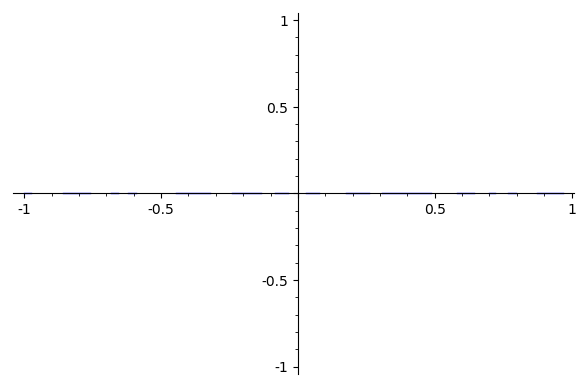

In [75]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_H[j])))
        print("")
    if E_mode:
        plot(eq_rot_H[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [76]:
if make_test_with_maxwell_equations:
    for j in range(3):
        print(eq_rot_rot_E[j])
        print("")

True

True

-1/4*(kappa^2*rho^2*bessel_J(m + 2, kappa*rho) + kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 2*kappa^2*rho^2*bessel_J(m, kappa*rho) - 2*kappa*rho*bessel_J(m + 1, kappa*rho) + 2*kappa*rho*bessel_J(m - 1, kappa*rho) - 4*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(D_z_0*cos(k_0*zz) + C_z_0*sin(k_0*zz))*cos(m*phi)/(kappa^2*rho^2) == 0



In [77]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Ez = (eq_rot_rot_E[2])
        display(Math(latex(eq_rot_rot_Ez)))

<IPython.core.display.Math object>

In [78]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [79]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


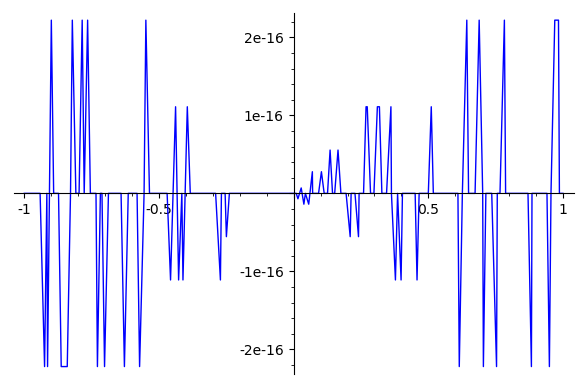

In [80]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [81]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Erh = (eq_rot_rot_E[0])
        display(Math(latex(eq_rot_rot_Erh)))

In [82]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

In [83]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

In [84]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [85]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Eph = (eq_rot_rot_E[1])
        display(Math(latex(eq_rot_rot_Eph)))

In [86]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

In [87]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

In [88]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [89]:
if make_test_with_maxwell_equations:
    display(Math(latex(eq_rot_rot_H)))

<IPython.core.display.Math object>

In [90]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hrh = (eq_rot_rot_H[0])
        display(Math(latex(eq_rot_rot_Hrh)))

<IPython.core.display.Math object>

In [91]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hph = (eq_rot_rot_H[1])
        display(Math(latex(eq_rot_rot_Hph)))

<IPython.core.display.Math object>

In [92]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hrh.lhs().operator())

<function mul_vararg at 0x7f49fd55fc20>


In [93]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hph.lhs().operator())

<function mul_vararg at 0x7f49fd55fc20>


In [94]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

<IPython.core.display.Math object>

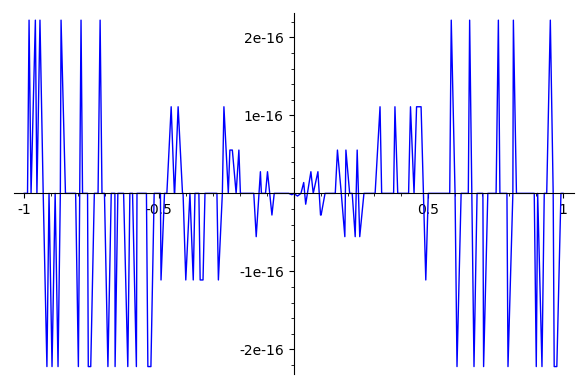

In [95]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [96]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

<IPython.core.display.Math object>

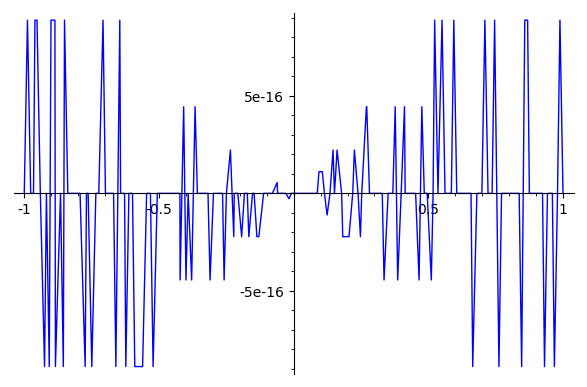

In [97]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [98]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Hz = (eq_rot_rot_H[2])
        display(Math(latex(eq_rot_rot_Hz)))

In [99]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Hz.lhs().operator())

In [100]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

In [101]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [102]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda r,p,z, i=i: " + str(diff(E_z[i](r,p,z),p)/r - E_ph[i](r,p,z).diff(z)) +"]"))

In [103]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda r,p,z, i=i: " + str(E_rh[i](r,p,z).diff(z)-diff(E_z[i](r,p,z),rh)) +"]"))

In [104]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda r,p,z, i=i: " + str(((r*E_ph[i](r,p,z)).diff(r) - E_rh[i](r,p,z).diff(p))/r) +"]"))

In [105]:
rotE_ph[0](rh,ph,z)

1/2*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa

In [106]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [107]:
rotE_rh[0](rh,ph,z)

-(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*sin(m*varphi)/rho - (D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho)

In [108]:
rotE_z[0](rh,ph,z)

0

In [109]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda r,p,z, i=i : rotE_rh[i](r,p,z)*c/(I*omega *mu[i])]

In [110]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda r,p,z, i=i : rotE_ph[i](r,p,z)*c/(I*omega *mu[i])]

In [111]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda r,p,z, i=i : rotE_z[i](r,p,z)*c/(I*omega *mu[i])]

In [112]:
H_rh_[0](rh,ph,z).factor()

I*(k_0^2 + kappa^2)*(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*c*m*bessel_j(m, kappa*rho)*sin(m*varphi)/(kappa^2*mu_0*omega*rho)

In [113]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [114]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [115]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

-1/2*I*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*c*k_0*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))/(kappa*mu_0*omega)

In [116]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [117]:
H_z_[0](rh,ph,z)

0

In [118]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [119]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,sum(h)) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,sum(h)) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

if E_mode:
    var_begin = C_z[0]
    var_end   = C_z[n_layers - 1]
else:
    var_begin = B_z[0]
    var_end   = B_z[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [120]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda r, p, z, i=i : " + str(E_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [121]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda r, p, z, i=i : " + str(E_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [122]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda r, p, z, i=i : " + str(E_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [123]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda r, p, z, i=i : " + str(H_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [124]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda r, p, z, i=i : " + str(H_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [125]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda r, p, z, i=i : " + str(H_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [126]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [127]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [128]:
if 2 < n_layers:
    display(Math(latex(E_rh[2](rh,ph,z))))
    display(Math(latex(E_rho[2](rh,ph,z))))

In [129]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [130]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [131]:
if 2 < n_layers:
    display(Math(latex(E_z[2](rh,ph,z))))
    display(Math(latex(E_zz[2](rh,ph,z))))

In [132]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [133]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [134]:
if 2 < n_layers:
    display(Math(latex(H_rh[2](rh,ph,z))))
    display(Math(latex(H_rho[2](rh,ph,z))))

In [135]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [136]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [137]:
if 2 < n_layers:
    display(Math(latex(H_ph[2](rh,ph,z))))
    display(Math(latex(H_phi[2](rh,ph,z))))

In [138]:
if 0 < n_layers:
    display(Math(latex(H_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

In [139]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [140]:
if 2 < n_layers:
    display(Math(latex(H_zz[2](rh,ph,z))))

In [141]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [142]:
all_vars = []
if E_mode:
    for i in range(n_layers):
        all_vars += [C_z[i], D_z[i]]
else:
    for i in range(n_layers):
        all_vars += [A_z[i], B_z[i]]
all_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [143]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [144]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [145]:
bch = []
bc =  []
for i  in range (n_layers-1):
    if E_mode:
        bc += [(E_rho[i](rh,ph, sum([h[i] for i in range(i+1)])) == E_rho[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(E_phi[i](rh,ph, sum([h[i] for i in range(i+1)])) == E_phi[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(epsilon[i] * E_z[i](rh,ph,sum([h[i] for i in range(i+1)])) == epsilon[i+1]*E_z[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,sum([h[i] for i in range(i+1)])) == H_phi [i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, sum([h[i] for i in range(i+1)])) == H_rho[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, sum([h[i] for i in range(i+1)])) == H_phi[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph,sum([h[i] for i in range(i+1)])) == mu[i+1]*H_z[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph,sum([h[i] for i in range(i+1)])) == E_phi [i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]

In [146]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [147]:
bch

[-1/2*I*D_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h_0*k_0)*cos(m*varphi)/(c*kappa) == -1/2*(I*D_z_1*cos(h_0*k_1) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [148]:
all_eqs = bc \
        + boundary_conductor

#display(Math(latex(all_eqs)))

In [149]:
M = GenerateMatrix(all_eqs, all_vars)

In [150]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [151]:
M.nrows(), M.ncols(), len(all_vars)

(5, 4, 4)

In [152]:
M.rank()

4

In [153]:
reduced_M = reduceDependedRows(M)


M.nrows() 5
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 2, 3, 4)


In [154]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [155]:
reduced_M.pivots()

(0, 1, 2, 3)

In [156]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [157]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 4
M.ncols() 4
M.rank() 4
len(vars) 4
M.pivots() = (0, 1, 2, 3)


In [158]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(4, 4, 4)

In [159]:
reduced_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [160]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [161]:
reduced_reduced_M

[                                                                                                                                                                0                                                                1/2*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/kappa                                                                                                                                                                 0 1/2*k_1*(cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - sin(h_0*k_1))*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa]
[                                                                                                                                                                0                                                                                                       epsilon_0*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)                          

In [162]:
type(reduced_reduced_M)

<class 'sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense'>

In [163]:
reduced_reduced_M.det()

1/2*epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_j(m -

In [164]:
exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [165]:
display(Math(latex(reduced_reduced_M_det)))

<IPython.core.display.Math object>

In [166]:
reduced_reduced_M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [167]:
M_det  = reduced_reduced_M_det

In [168]:
M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [169]:
# display(Math(latex(M_det)))

In [170]:
M_det_num = M_det.numerator()

In [171]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin

In [172]:
M_det_num.variables()

(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1, kappa, m, rho, varphi)

In [173]:
M_det.full_simplify().numerator()

-(epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) - epsilon_1*k_0*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) + epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*sin(h_1*k_1) - epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*sin(h_1*k_1))*cos(m*varphi)^2

In [174]:
M_det_num_expand = M_det_num.expand()

In [175]:
M_det_num_expand.operator()

<function add_vararg at 0x7f49fec12f80>

In [176]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)

-epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)

-epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1)

epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1)

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_

In [177]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin

In [178]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1))*(bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho))*bessel_J(m, kappa*rho)*cos(m*varphi)^2

In [179]:
M_det_num_factor.operator()

<function mul_vararg at 0x7f49fd55fc20>

In [180]:
M_det_num_factor.operands()

[epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),
 bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho),
 bessel_J(m, kappa*rho),
 cos(m*varphi)^2]

In [181]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
    print ("")
    
M_det_num_factor_operands

epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1)
(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1)

bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho)
(kappa, m, rho)

bessel_J(m, kappa*rho)
(kappa, m, rho)

cos(m*varphi)^2
(m, varphi)



(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),)

In [182]:
M_det_num_factor_operands

(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),)

In [183]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [184]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [185]:
M_det_num.variables()

(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1)

In [186]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h[i]*k[i]))).full_simplify().expand()

In [187]:
M_det_num

epsilon_0*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + epsilon_1*cos(h_1*k_1)/(k_1*sin(h_1*k_1))

In [188]:
disp_eq = M_det_num == 0

In [189]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [190]:
bch

[-1/2*I*D_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h_0*k_0)*cos(m*varphi)/(c*kappa) == -1/2*(I*D_z_1*cos(h_0*k_1) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [191]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [192]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch[i].subs(solve (bc[0], C_z[1])), D_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch[i].subs(solve (bc[0], B_z[1])), A_z[i+1])[0].full_simplify ().factor () ]
bchs.reverse()

In [193]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [194]:
bcs = []
for i in range(n_layers-1):
    if E_mode:
        bcs +=  solve (bc[3*i], C_z[i+1])
    else:
        bcs +=  solve (bc[3*i], B_z[i+1])
bcs

[]

In [195]:
b_s = [h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers):
    b_s += [h[i] == g[i]*b]
    
b_s

[h_0 == -b*(g_1 - 1), h_1 == b*g_1]

In [196]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda r, p, z, i=i : E_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [197]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda r, p, z, i=i : E_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [198]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda r, p, z, i=i : E_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [199]:
H_rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda r, p, z, i=i : H_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [200]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda r, p, z, i=i : H_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [201]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda r, p, z, i=i : H_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [202]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [203]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [204]:
if 2 < n_layers:
    display(Math(latex(E_rho_s [2](rh,ph,z))))

In [205]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [206]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [207]:
if 2 < n_layers:
    display(Math(latex(E_phi_s [2](rh,ph,z))))

In [208]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [209]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [210]:
if 2 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[2](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[2](rh,ph,z))))

In [211]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [212]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [213]:
if 2 < n_layers:
    display(Math(latex(H_rho_s[2](rh,ph,z))))

In [214]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [215]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [216]:
if 2 < n_layers:
    display(Math(latex(H_phi_s[2](rh,ph,z))))

In [217]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

In [218]:
disp_eq

epsilon_0*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + epsilon_1*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [219]:
if E_mode:
    bessel_root_1 = first_bessel_roots[n_val]
else:
    bessel_root_1 = first_bessel_d_roots[n_val]

bessel_root_1

2.404825557695772

In [220]:
kappa_d1 = bessel_root_1/a

In [221]:
#sgs
# https://iopscience.iop.org/article/10.1149/1.2113993/pdf
# DC and ac electrical conductivities of silicon dioxide thermally grown on p‐ (boron‐doped) and n‐type (phosphorous‐doped) silicon have been measured in the temperature range of 25°–1100°C. 
# Total dc conductivities varied from 10−9 to 10−16 Ω−1cm−1
# sigma_sgse = 9*10^9 * sigma_SI

# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == a_val, mu[0] == 1, sigma[0] == 9*10^9 * 10 ^-9]
epsilon_values = [epsilon[0] == 2.468^2]

if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.67^2, sigma[1] == 9*10^9 * 10 ^-9]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[1] == 1, sigma[1] == 9*10^9 * 10 ^-9]
    epsilon_values += [epsilon[1] == 1.487^2]
    #epsilon_values += [epsilon[1] == 2.468^2]
    
if 2 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[2] == 1, sigma[2] == 9*10^9 * 10 ^-9]
    epsilon_values += [epsilon[2] == 1.487^2]

#if 3 < n_layers:
#    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
#    digit_values += [mu[3] == 1, epsilon[3] == 1.487^2, sigma[3] == 9*10^9 * 10 ^-9]
    
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
print(omega_value[0].rhs().n())

2.98046134067856e15


In [222]:
epsilon_d = []
mu_d = []

for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(epsilon_values)]
    mu_d      += [mu[i].subs(digit_values)]

In [223]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs(epsilon_values).subs (c_value).subs(omega_value)]

In [224]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.040161013631574864,
 2.21435767505208e9*pi^2 - k_1^2 == 0.040161013631574864]

In [225]:
disp_eq_d = disp_eq.subs(digit_values).subs(epsilon_values).subs (c_value)

In [226]:
disp_eq_d

6.09102400000000*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + 2.21116900000000*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [227]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [228]:
k_values

[k_0 == 1/39*sqrt(18555615093735/2*pi^2 - 926467802/15166887),
 k_1 == 1/3*sqrt(24493010243751/1229*pi^2 - 5482058/15166887)]

In [229]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [230]:
k_values_d

[k_0 == 245362.362944843, k_1 == 147833.806198852]

In [231]:
disp_eq_d

6.09102400000000*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + 2.21116900000000*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [232]:
disp_eq_s = disp_eq_d.subs(k_values_d).subs(kappa == kappa_d1)

In [233]:
disp_eq_s

0.0000248246060516187*cos(245362.362944843*h_0)/sin(245362.362944843*h_0) + 0.0000149571269038811*cos(147833.806198852*h_1)/sin(147833.806198852*h_1) == 0

In [234]:
disp_eq_brakes_dict = dict()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print (operand2.variables())
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, lambda_d)
            operand_denominator_roots.sort()
            print(operand_denominator_roots)
            key = str(operand2.variables()[0])
            print("key =", key)
            if key in disp_eq_brakes_dict.keys():
                for rt in operand_denominator_roots:
                    if rt not in disp_eq_brakes_dict[key]:
                        disp_eq_brakes_dict[key] += [rt]
            else:
                disp_eq_brakes_dict[key] = operand_denominator_roots

            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            print ("")
    else:
        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
        operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, lambda_d)
        operand_denominator_roots.sort()
        print(operand_denominator_roots)
        key = str(operand_denominator.variables()[0])
        print("key =", key)
        if key in disp_eq_brakes_dict.keys():
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes_dict[key]:
                    disp_eq_brakes_dict[key] += [rt]
        else:
            disp_eq_brakes_dict[key] = operand_denominator_roots

        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        #    M_det_num_factor_operands += (operand,)
        print ("")

for key in disp_eq_brakes_dict.keys():
    disp_eq_brakes_dict[key].sort()

0.0000248246060516187*cos(245362.362944843*h_0)/sin(245362.362944843*h_0)
(h_0,)
operand_denominator sin(245362.362944843*h_0)
operand_denominator_operator sin
operand_denominator_variables (h_0,)
[1.2803889789307365e-05, 2.56077797302211e-05, 3.841166927753664e-05, 5.121555915573078e-05]
key = h_0

0.0000149571269038811*cos(147833.806198852*h_1)/sin(147833.806198852*h_1)
(h_1,)
operand_denominator sin(147833.806198852*h_1)
operand_denominator_operator sin
operand_denominator_variables (h_1,)
[2.1250840817325112e-05, 4.250168123918935e-05]
key = h_1



In [235]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [236]:
disp_eq_brakes_dict

{'h_0': [1.2803889789307365e-05,
  2.56077797302211e-05,
  3.841166927753664e-05,
  5.121555915573078e-05],
 'h_1': [2.1250840817325112e-05, 4.250168123918935e-05]}

In [237]:
#disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

In [238]:
disp_eq_s.lhs()

0.0000248246060516187*cos(245362.362944843*h_0)/sin(245362.362944843*h_0) + 0.0000149571269038811*cos(147833.806198852*h_1)/sin(147833.806198852*h_1)

In [239]:
disp_eq_b = disp_eq.subs(h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b)
for i in range(1,n_layers):
    disp_eq_b = disp_eq_b.subs(h[i] == g[i]*b)
    
disp_eq_b

epsilon_0*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0

In [240]:
disp_eq_b_d = disp_eq_b.subs(digit_values).subs(epsilon_values).subs(c_value).subs(k_values_d).subs(kappa == kappa_d1)
disp_eq_b_d

0.0000248246060516187*cos(-245362.362944843*b*(g_1 - 1))/sin(-245362.362944843*b*(g_1 - 1)) + 0.0000149571269038811*cos(147833.806198852*b*g_1)/sin(147833.806198852*b*g_1) == 0

In [241]:
display(Math(latex(disp_eq_b)))

<IPython.core.display.Math object>

In [242]:
display(Math(latex(disp_eq_b_d)))

<IPython.core.display.Math object>

In [243]:
a0 = var("a0")
if E_mode:
    amplitude_variable = D_z[0]
else:
    amplitude_variable = A_z[0]

In [244]:
E2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho[i](r, p, z))^2 +
           Im(E_rho[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [245]:
E2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi[i](r, p, z))^2 +
           Im(E_phi[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [246]:
E2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [247]:
E2_8pi_rho[0](r,p,z)

1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa)^2/pi

In [248]:
border_h = [(1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers-1):
    border_h += [(border_h[i-1] + g[i]*b).expand()]
    
border_h

[-b*(g_1 - 1)]

In [249]:
dDE_8pi_rho = []
dDE_8pi_phi = []
dDE_8pi_z = []
for i in range(n_layers - 1):
    dDE_8pi_rho += [lambda r,p, i=i: (epsilon[i]-epsilon[i+1]) *
                              E2_8pi_rho[i  ](r,p,border_h[i], 1)]

    dDE_8pi_phi += [lambda r,p, i=i: (epsilon[i]-epsilon[i+1]) *
                              E2_8pi_phi[i  ](r,p,border_h[i], 1)]

    dDE_8pi_z += [lambda r,p, i=i: (epsilon[i]-epsilon[i+1]) *
                             (epsilon[i]/epsilon[i+1]) *
                             E2_8pi_z[i  ](r,p,border_h[i], 1)]

dDE_8pi = lambda r,p : sum ([dDE_8pi_rho[i](r,p) + 
                            dDE_8pi_phi[i](r,p) + 
                            dDE_8pi_z  [i](r,p) for i in range(n_layers - 1)])

In [250]:
dDE_8pi(r,p)

1/16*D_z_0^2*(epsilon_0 - epsilon_1)*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*kappa^4*r^2) + 1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa)^2*(epsilon_0 - epsilon_1)/pi + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*(epsilon_0 - epsilon_1)*epsilon_0/(pi*epsilon_1)

In [251]:
dDE_8pi_s = lambda r, p : dDE_8pi(r,p).subs(bcs).subs(bchs).subs(bchs).subs(b_s)

In [252]:
dDE_8pi_s(r,p)

1/16*D_z_0^2*(epsilon_0 - epsilon_1)*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*kappa^4*r^2) + 1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa)^2*(epsilon_0 - epsilon_1)/pi + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*(epsilon_0 - epsilon_1)*epsilon_0/(pi*epsilon_1)

In [253]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho_s[i](r, p, z))^2 +
           Im(E_rho_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [254]:
E2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi_s[i](r, p, z))^2 +
           Im(E_phi_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [255]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [256]:
E2_8pi_rho_s[0](r,p,z)

1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa)^2/pi

In [257]:
E2_8pi_phi_s[0](rh,ph,z)

1/16*D_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rho)^2*sin(m*varphi)^2*sin(k_0*z)^2/(pi*kappa^4*rho^2)

In [258]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

1/16*D_z_0^2*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2*cos(k_0*z)^2/pi


In [259]:
H_rho[i](r, p, z)

(I*D_z_1*cos(k_1*z) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(k_1*z)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)

In [260]:
H2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho[i](r, p, z))^2 +
           Im(H_rho[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [261]:
H2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi[i](r, p, z))^2 +
           Im(H_phi[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [262]:
H2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z[i](r, p, z))^2 +
           Im(H_z[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [263]:
H2_8pi_rho[0](rh,ph,z)

1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*c^2*kappa^4*rho^2)

In [264]:
H2_8pi_phi[0](rh,ph,z)

1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa))^2/pi

In [265]:
H2_8pi_z[0](rh,ph,z)

0

In [266]:
H2_8pi_rho[n_layers-1](rh,ph,z)

1/16*(D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*rho)*cos(k_1*z)*sin(m*varphi)/(c*kappa^2*rho) + D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*rho)*sin((h_0 + h_1)*k_1)*sin(m*varphi)*sin(k_1*z)/(c*kappa^2*rho*cos((h_0 + h_1)*k_1)))^2/pi

In [267]:
H2_8pi_phi[n_layers-1](rh,ph,z)

1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_1*z)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_1*z)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*sin((h_0 + h_1)*k_1)*sin(k_1*z)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*sin((h_0 + h_1)*k_1)*sin(k_1*z)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi

In [268]:
H2_8pi_z[n_layers-1](rh,ph,z)

0

In [269]:
dH2_8pi_rho = lambda r, p : H2_8pi_rho[n_layers-1](r,p,b) - H2_8pi_rho[0](r,p,0)

In [270]:
dH2_8pi_phi = lambda r, p : H2_8pi_phi[n_layers-1](r,p,b) - H2_8pi_phi[0](r,p,0)

In [271]:
dH2_8pi_z = lambda r, p : H2_8pi_z[n_layers-1](r,p,b) - H2_8pi_z[0](r,p,0)

In [272]:
dH2_8pi = lambda r,p : dH2_8pi_rho(r,p) + \
                       dH2_8pi_phi(r,p) + \
                       dH2_8pi_z  (r,p)

In [273]:
dH2_8pi(r,p)

-1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) + 1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi - 1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(m*p)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(m*p)/(c*kappa))^2/pi + 1/16*(D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*r)*cos(b*k_1)*sin(m*p)/(c*kappa^2*r) + D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*r)*sin(b*k_1)*sin((h_0 + h_1)*k_1)*sin(m*p)/(c*kappa^2*r*cos((h_0 + h_1)*k_1)))^2/pi

In [274]:
dH2_8pi_s = lambda r, p : dH2_8pi(r,p).subs(bcs).subs(bchs).subs(bchs).subs(b_s)

In [275]:
dH2_8pi_s(r,p)

-1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) + 1/64*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/(c*kappa*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/(c*kappa*cos(b*g_1*k_1)) + (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p)*sin(-(b*(g_1 - 1) - b*g_1)*k_1)*sin(b*k_1)/(c*kappa*cos(b*g_1*k_1)*cos(-(b*(g_1 - 1) - b*g_1)*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p)*sin(-(b*(g_1 - 1) - b*g_1)*k_1)*sin(b*k_1)/(c*kappa*cos(b*g_1*k_1)*cos(-(b*(g_1 - 1) - b*g_1)*k_1

In [276]:
(dH2_8pi(r,p)+dDE_8pi(r,p))

1/16*D_z_0^2*(epsilon_0 - epsilon_1)*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*kappa^4*r^2) - 1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) + 1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa)^2*(epsilon_0 - epsilon_1)/pi + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*(epsilon_0 - epsilon_1)*epsilon_0/(pi*epsilon_1) + 1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi - 1/64*(D_

In [277]:
(dH2_8pi_s(r,p)+dDE_8pi_s(r,p))

1/16*D_z_0^2*(epsilon_0 - epsilon_1)*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*kappa^4*r^2) - 1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) + 1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa)^2*(epsilon_0 - epsilon_1)/pi + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*(epsilon_0 - epsilon_1)*epsilon_0/(pi*epsilon_1) + 1/64*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/(c*kappa*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/(c*kappa*cos(b*g_1*k_1)) + (cos(-b*(g_1 - 1)*k_1)*cos

In [278]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho_s[i](r, p, z))^2 +
           Im(H_rho_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [279]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi_s[i](r, p, z))^2 +
           Im(H_phi_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [280]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z_s[i](r, p, z))^2 +
           Im(H_z_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [281]:
H2_8pi_rho_s[0](rh,ph,z)

1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*c^2*kappa^4*rho^2)

In [282]:
H2_8pi_phi_s[0](rh,ph,z)

1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa))^2/pi

In [283]:
H2_8pi_z_s[0](rh,ph,z)

0

In [284]:
def calc_f_surf(ra, g1, epsilon0, epsilon1, debug = False):
    eq_kappa_d_ = []
    for i in range(n_layers):
        eq_kappa_d_ += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values) \
                        .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                        .subs (c_value).subs(omega_value)]
    k_values_symbolic = []
    k_values_symbolic_d_ = []
    k_values_ = []
    k_values_d_ = []
    for i in range(n_layers):
        assume (k [i] > 0)
        k_values_symbolic += solve (eq_kappa[i], k[i])
        k_values_ += solve (eq_kappa_d_[i], k[i])
        k_values_d_ += [k_values_ [i].lhs() == k_values_ [i].rhs().n() ]
        k_values_symbolic_d_ += [k[i] == k_values_symbolic[i].rhs().subs(kappa == kappa_d1).subs(digit_values) \
                                 .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                                 .subs(c_value).subs(omega_value).n()]
        if debug:
            print("k_values_symbolic_d_[", i, "]", k_values_symbolic_d_[i].rhs().n())

    if debug:
        print("eq_kappa = ", eq_kappa)
        print("")
        print("k_values_symbolic", k_values_symbolic)
        print("")
        print("k_values_symbolic_d_ = ", k_values_symbolic_d_)
        print("")
        print("k_values_d_ = ", k_values_d_)
        print("")
        print("disp_eq_b = ", disp_eq_b)
        display(Math(latex(disp_eq_b)))
    
    disp_eq_b_symb = disp_eq_b.subs(k_values_symbolic)
    disp_eq_b_d_ = disp_eq_b_symb.subs(kappa == kappa_d1).subs(digit_values) \
                                 .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                                 .subs(c_value).subs(omega_value).full_simplify()
    #.subs(k_values_d)
    disp_eq_b_d_s = disp_eq_b_d.subs(g_1 == g1).subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1)
    disp_eq_b_d_s_ = disp_eq_b_d_.subs(g_1 == g1).full_simplify()
    
    if debug:
        print ("disp_eq_b_symb =", disp_eq_b_symb)
        display(Math(latex(disp_eq_b_symb)))
        print ("disp_eq_b_d_ =", disp_eq_b_d_)
        print ("")
        print ("disp_eq_b_d_.variables() =", disp_eq_b_d_.variables())
        print ("")
        print ("disp_eq_b_d_s =", disp_eq_b_d_s)
        print ("")
        print ("disp_eq_b_d_s.variables() =", disp_eq_b_d_s.variables())
        print ("")
        print ("disp_eq_b_d_s_ =", disp_eq_b_d_s_)
        print ("")
        print ("disp_eq_b_d_s_.variables() =", disp_eq_b_d_s_.variables())
        print ("")
    
    #disp_eq_b_d_s
    disp_eq_brakes_b = [0]
    if debug:
        print("disp_eq_b_d_s.lhs().operands()", disp_eq_b_d_s.lhs().operands())

    for operand in disp_eq_b_d_s.lhs().operands():
        if debug:
            print ("operand", operand)
            print ("operand.variables()", operand.variables())
        operand_denominator = operand.denominator()
        if debug:
            print ("operand_denominator", operand_denominator)
        from sage.symbolic.operators import add_vararg, mul_vararg
        operand_denominator_operator = operand_denominator.operator()
        if debug:
            print ("operand_denominator_operator", operand_denominator_operator)
        operand_denominator_variables = operand_denominator.variables()
        if debug:
            print ("operand_denominator_variables", operand_denominator_variables)

        if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
            for operand_denominator_i in operand_denominator.operands():
                if debug:
                    print("operand_denominator_i", operand_denominator_i)
                operand_denominator_i_roots = find_root_recursive(operand_denominator_i, lambda_d/32, 10*lambda_d)
                operand_denominator_i_roots.sort()
                if debug:
                    print("operand_denominator_i_roots", operand_denominator_i_roots)
                    
                if len(operand_denominator_i_roots) > 0:
                    for rt in operand_denominator_i_roots:
                        if rt not in disp_eq_brakes_b:
                            disp_eq_brakes_b += [rt]
                else:
                    operand_denominator_sols_i = solve(operand_denominator_i, operand_denominator_i.variables()[0])
                    if debug:
                        print("operand_denominator_sols_i", operand_denominator_sols_i)
                    for sl in operand_denominator_sols_i:
                        if sl.rhs() not in disp_eq_brakes_b:
                            disp_eq_brakes_b += [sl.rhs()]                          
        else:
            if debug:
                print("operand_denominator", operand_denominator)
            operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, 10*lambda_d)
            operand_denominator_roots.sort()
            if debug:
                print("operand_denominator_roots", operand_denominator_roots)

            if len(operand_denominator_roots) > 0:
                for rt in operand_denominator_roots:
                    if rt not in disp_eq_brakes_b:
                        disp_eq_brakes_b += [rt]
            elif len(operand_denominator_variables) > 0:
                operand_denominator_sols = solve(operand_denominator, operand_denominator.variables()[0])
                if debug:
                    print("operand_denominator_sols", operand_denominator_sols)
                for sl in operand_denominator_sols:
                    if sl.rhs() not in disp_eq_brakes_b:
                        disp_eq_brakes_b += [sl.rhs()]

    disp_eq_brakes_b.sort()

    b_lst_ = []

    xeps = lambda_d/1024
    for i in range(len(disp_eq_brakes_b)-1):
        try:
            #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
            b_lst_ += find_root_recursive (disp_eq_b_d_s.lhs(), disp_eq_brakes_b[i] + xeps, disp_eq_brakes_b[i+1] - xeps)
        except  Exception as ex:
            print(str(ex))
            print(disp_eq_brakes_b[i])
            print(disp_eq_brakes_b[i+1])
    b_lst_.sort()

    b_sol_ = b_lst_[h_val]
    #print("b_sol_", b_sol_)
    
    b_sol_ = find_newton_root(f = disp_eq_b_d_s.lhs(), x = b, xn = b_sol_)

    h_s_ = []
    for i in range(n_layers):
        h_s_ += [b_s[i].subs(digit_values).subs(b == b_sol_).subs(g_1 == g1)]
    #h_s_

    h_sol_ = [0]
    for i in range(n_layers):
        h_sol_ += [h_sol_[i] + h_s_[i].rhs()]
    #h_sol_
    #print("h_sol_", h_sol_)

    if debug:
        plt = sage.plot.graphics.Graphics()
        plt += plot (disp_eq_b_d_s.lhs(), (b, b_sol_*0.1, b_sol_*1.1))
        plt.show ()
    
        plt = sage.plot.graphics.Graphics()
        plt += plot (disp_eq_b_d_s_.lhs(), (b, b_sol_*0.1, b_sol_*1.1))
        plt.show ()
        
        plt = sage.plot.graphics.Graphics()
        plt += plot ([disp_eq_b_d_s.lhs(), disp_eq_b_d_s_.lhs()], (b, b_sol_*0.01, b_sol_*1.1))
        plt.show ()
        
    f_dielectric_surf_rho_ = []
    f_dielectric_surf_phi_ = []
    f_dielectric_surf_z_ = []

    for i in range(n_layers - 1):
          
        f_dielectric_surf_rho_ += [lambda rh,ph,  i=i: (epsilon[i]-epsilon[i+1]) *
                                  E2_8pi_rho_s[i  ](rh,ph,border_h[i], 1)]

        f_dielectric_surf_phi_ += [lambda rh,ph,  i=i: (epsilon[i]-epsilon[i+1]) *
                                  E2_8pi_phi_s[i  ](rh,ph,border_h[i], 1)]

        f_dielectric_surf_z_ += [lambda rh,ph,  i=i: (epsilon[i]-epsilon[i+1])*
                                 (epsilon[i]/epsilon[i+1])*
                                 E2_8pi_z_s[i  ](rh,ph,border_h[i], 1)]
        #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*
        #                        (epsilon_d[i+1]/epsilon_d[i])*
        #                        E2_8pi_z_s[i+1](rh,ph,border_h[i], 1)]

    f_dielectric_surf_ = lambda rh,ph : sum ([f_dielectric_surf_rho_[i](rh,ph) + 
                                              f_dielectric_surf_phi_[i](rh,ph) + 
                                              f_dielectric_surf_z_[i](rh,ph) for i in range(n_layers - 1)])
    
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="E_rho_s")
        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([E_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([E_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="E_phi_s")
        
        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([E_z_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([H_z_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        if E_mode:
            plt.show (title="E_z_s")
        else:
            plt.show (title="H_z_s")
        


    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([H_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([H_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="H_rho_s")
        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([H_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([H_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                              .subs(amplitude_variable == 1) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="H_phi_s")

    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            plt += plot ([H2_8pi_phi_s[i](r,p,z,1).subs(r == rho, p == phi).subs(digit_values) \
                          .subs(omega_value) \
                          .subs(kappa == kappa_d1) \
                          .subs(c_value) \
                          .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                          .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                          .subs(amplitude_variable == 1) \
                          for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="H2_8pi_phi_s")

        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            plt += plot ([E2_8pi_rho_s[i](r,p,z,1).subs(r == rho, p == phi).subs(digit_values) \
                          .subs(omega_value) \
                          .subs(kappa == kappa_d1) \
                          .subs(c_value) \
                          .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                          .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
                          .subs(amplitude_variable == 1) \
                          for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="E2_8pi_rho_s")

        

    f_metal_surf_ = lambda rh, ph : \
       ((H2_8pi_rho_s[n_layers - 1](rh,ph,b_sol_,1) + 
         H2_8pi_phi_s[n_layers - 1](rh,ph,b_sol_,1) +
         H2_8pi_z_s  [n_layers - 1](rh,ph,b_sol_,1) )
        -
        (H2_8pi_rho_s[0](rh,ph,0,1) + 
         H2_8pi_phi_s[0](rh,ph,0,1) +
         H2_8pi_z_s  [0](rh,ph,0,1) ))
        #+
        #sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
        #(E2_8pi_rho_s[i](rh,ph,h_sol_[i+1],1) + 
        # E2_8pi_phi_s[i](rh,ph,h_sol_[i+1],1) )
        #for i in range(n_layers - 1)]))

    f_surf_ = lambda rh,ph : (f_metal_surf_(rh,ph)  + f_dielectric_surf_(rh,ph) ).expand()
    
    f_surf_2_ = lambda rh,ph : (dH2_8pi_s(rh,ph) + dDE_8pi_s(rh,ph)).expand()

    if debug:
        print("f_surf_(rh,ph) =", f_surf_(rh,ph) )
        print("")
        print("f_surf_(rh,ph).variables() =", f_surf_(rh,ph).variables())
        print("")

    f_surf_sol(rh,ph) = f_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
              .subs(amplitude_variable == 1)

    f_surf_2_sol(rh,ph) = f_surf_2_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
              .subs(amplitude_variable == 1)

    f_metal_surf_sol(rh,ph) = f_metal_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
              .subs(amplitude_variable == 1)

    f_dielectric_surf_sol(rh,ph) = f_dielectric_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon[0] == epsilon0).subs(epsilon[1] == epsilon1) \
              .subs(amplitude_variable == 1)
    #print("f_surf_sol",f_surf_sol)
    
    f_surf_sol_rh_int_ph = []
    f_surf_2_sol_rh_int_ph = []
    f_metal_surf_sol_rh_int_ph = []
    f_dielectric_surf_sol_rh_int_ph = []

    #print("f_surf_sol_rh_int_ph = lambda rh : " +  str(integrate(f_surf_sol(rh,ph) * rh, (ph,0,2*pi))))
    exec(preparse("f_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("f_surf_2_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_surf_2_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("f_metal_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_metal_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("f_dielectric_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_dielectric_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    #print("f_surf_sol_rh_int_ph(rh) = ", f_surf_sol_rh_int_ph[0](rh))
    
    if (ra == ra):
        f_surf_sol_rh_int_ph_r = f_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        f_surf_2_sol_rh_int_ph_r = f_surf_2_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        f_metal_surf_sol_rh_int_ph_r = f_metal_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        f_dielectric_surf_sol_rh_int_ph_r = f_dielectric_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        #print("f_surf_sol_rh_int_ph_r", f_surf_sol_rh_int_ph_r)
    else: # ra is nan
        print ("ra is nan so integrate (rh, 0, a_val)")
        from scipy import integrate as scipy_integrate

        f_surf_sol_rh_int_ph_integrand = f_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        print("f_surf_sol_rh_int_ph_integrand", f_surf_sol_rh_int_ph_integrand)
        if 0 != f_surf_sol_rh_int_ph_integrand:
            f_surf_sol_rh_int_ph_r = scipy_integrate.quad(f_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            f_surf_sol_rh_int_ph_r = 0

        f_metal_surf_sol_rh_int_ph_integrand = f_metal_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if 0 != f_metal_surf_sol_rh_int_ph_integrand:
            f_metal_surf_sol_rh_int_ph_r = scipy_integrate.quad(f_metal_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            f_metal_surf_sol_rh_int_ph_r = 0

        f_dielectric_surf_sol_rh_int_ph_integrand = f_dielectric_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        print("f_dielectric_surf_sol_rh_int_ph_integrand", f_dielectric_surf_sol_rh_int_ph_integrand)
        if 0 != f_dielectric_surf_sol_rh_int_ph_integrand:
            f_dielectric_surf_sol_rh_int_ph_r = scipy_integrate.quad(f_dielectric_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            f_dielectric_surf_sol_rh_int_ph_r = 0
    
    return f_surf_sol_rh_int_ph_r, f_surf_2_sol_rh_int_ph_r, f_metal_surf_sol_rh_int_ph_r, f_dielectric_surf_sol_rh_int_ph_r, b_sol_


k_values_symbolic_d_[ 0 ] 245362.362944843
k_values_symbolic_d_[ 1 ] 147833.806198852
eq_kappa =  [-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 245362.362944843, k_1 == 147833.806198852]

k_values_d_ =  [k_0 == 245362.362944843, k_1 == 147833.806198852]

disp_eq_b =  epsilon_0*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0


<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_0*cos(-sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_1*cos(sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)*b*g_1/c)) == 0


<IPython.core.display.Math object>

disp_eq_b_d_ = ((66289178956.3402*cos(1/29979245800*sqrt((1.99016542802867e+30)*pi^2 - 3.60949189846978e+19)*b*g_1)*cos(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b)*sin(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b*g_1) - 66289178956.3402*cos(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b*g_1)*cos(1/29979245800*sqrt((1.99016542802867e+30)*pi^2 - 3.60949189846978e+19)*b*g_1)*sin(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b))*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19) + (-182604305669.699*cos(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b*g_1)*cos(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b)*sin(1/29979245800*sqrt((1.99016542802867e+30)*pi^2 - 3.60949189846978e+19)*b*g_1) - 182604305669.699*sin(1/29979245800*sqrt((5.4822337804541e+30)*pi^2 - 3.60949189846978e+19)*b*g_1)*sin(1/29979245800*sqrt((1.99016542802867e+30)*pi^

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:130: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


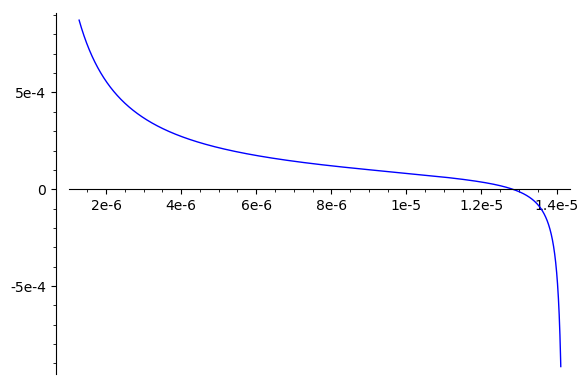

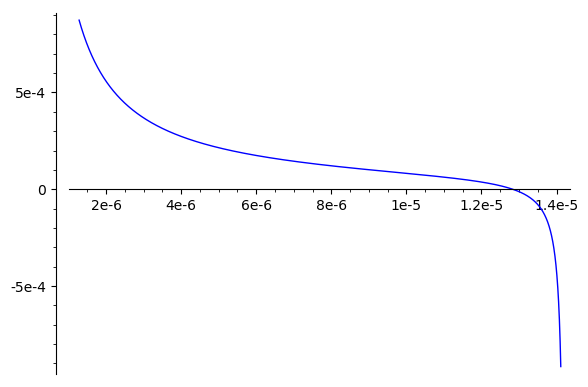

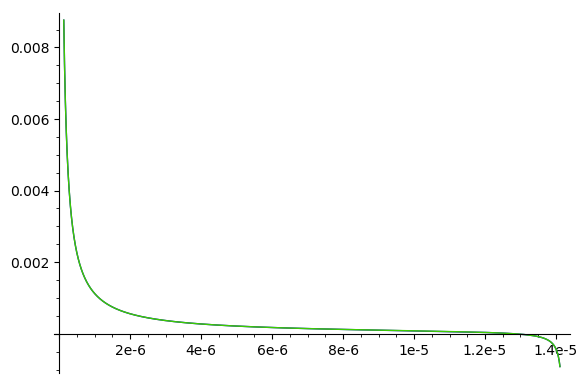

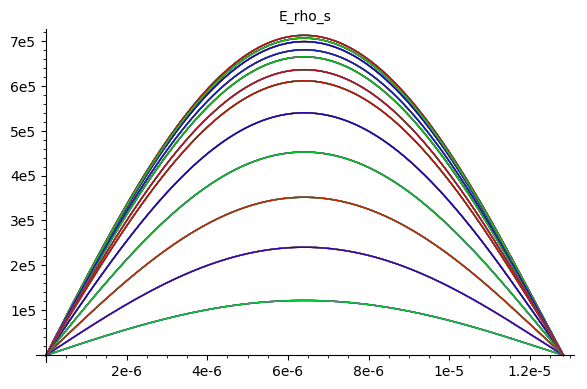

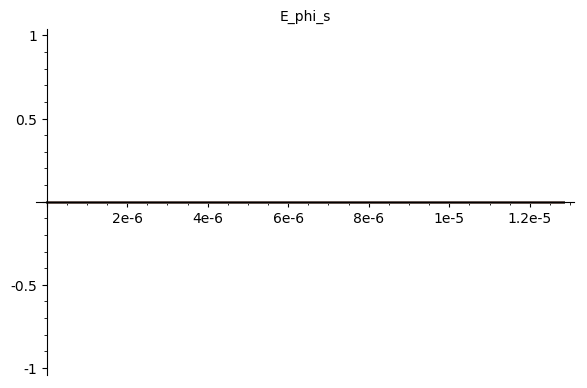

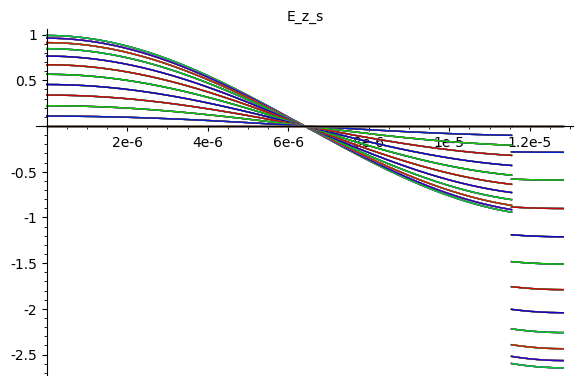

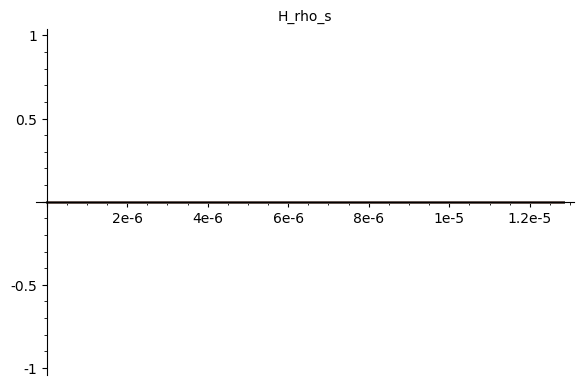

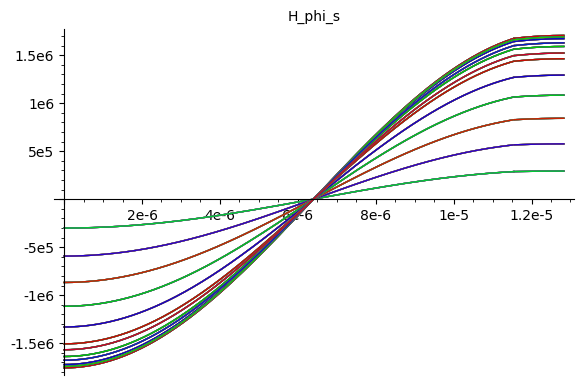

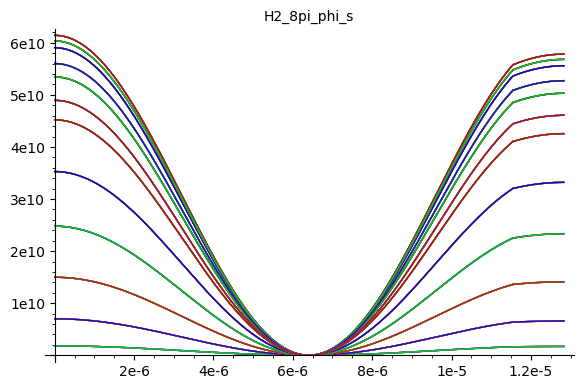

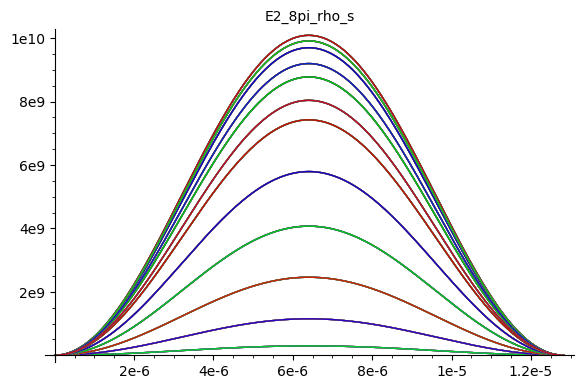

f_surf_(rh,ph) = 1/64*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rho)^2*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)^2*cos(m*varphi)^2*cos(0.000012829728314688933576525990687411*k_1)^2/(pi*c^2*kappa^2) - 1/32*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)^2*cos(m*varphi)^2*cos(0.000012829728314688933576525990687411*k_1)^2/(pi*c^2*kappa^2) + 1/64*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m - 1, kappa*rho)^2*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)^2*cos(m*varphi)^2*cos(0.000012829728314688933576525990687411*k_1)^2/(pi*c^2*kappa^2) + 1/32*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rho)^2*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)*cos(m*varphi)^2*cos(0.000012829728314688933576525990687411*k_1)^2*sin(b*g_1*k_1 - b*k_1)*sin(b*g_1*k_1)/(pi*c^2*kappa^2*cos(b*g_1*k_1)) - 1/16*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g

(2*pi*(-3.37403395478996e7*pi + 3.33003804290526e8/pi),
 2*pi*(-3.37403395478996e7*pi + 0.0603368881755619*C_z_0^2/pi - 0.378735177204338*C_z_0/pi + 3.33003804290526e8/pi),
 -6.74806790957990e7*pi^2,
 6.66007608581052e8,
 0.000012829728314688933576525990687411)

In [285]:
calc_f_surf(ra = 1, g1 = 0.1, epsilon0 = epsilon_d[0], epsilon1 = epsilon_d[1], debug = True)

k_values_symbolic_d_[ 0 ] 140597.561333983
k_values_symbolic_d_[ 1 ] 140597.561333983
eq_kappa =  [-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 140597.561333983, k_1 == 140597.561333983]

k_values_d_ =  [k_0 == 140597.561333983, k_1 == 140597.561333983]

disp_eq_b =  epsilon_0*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0


<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_0*cos(-sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_1*cos(sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_1*mu_1*omega^2)*b*g_1/c)) == 0


<IPython.core.display.Math object>

disp_eq_b_d_ = -296045052275/256*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*sin(512/296045052275*sqrt(6)*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*b)/((111604131601355685322817536*sqrt(6)*pi^2 - 2237840388054639*sqrt(6))*cos(512/296045052275*sqrt(6)*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*b)*sin(512/296045052275*sqrt(6)*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*b*g_1)^2 - (111604131601355685322817536*sqrt(6)*pi^2 - 2237840388054639*sqrt(6))*cos(512/296045052275*sqrt(6)*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*b*g_1)*sin(512/296045052275*sqrt(6)*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*b*g_1)*sin(512/296045052275*sqrt(6)*sqrt(111604131601355685322817536*pi^2 - 2237840388054639)*b)) == 0

disp_eq_b_d_.variables() = (b, g_1)

disp_eq_b_d_s = 0.0000248246060516187*cos(171753.654061390*b)/sin(171753.654061390*b) + 0.0000149571269038811*cos(44350.1418596557*b)/sin(44350.1418596557*b) == 0

disp

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:130: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


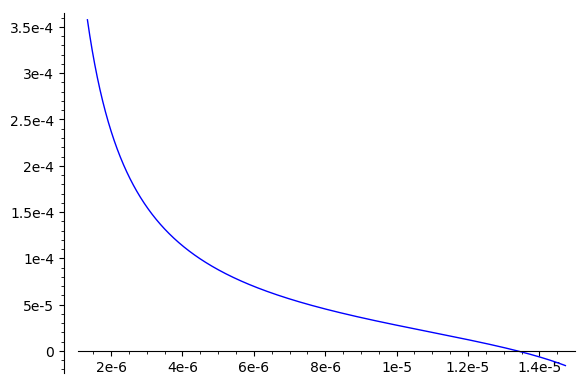

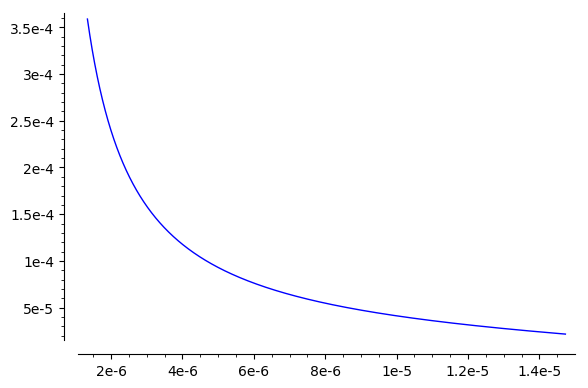

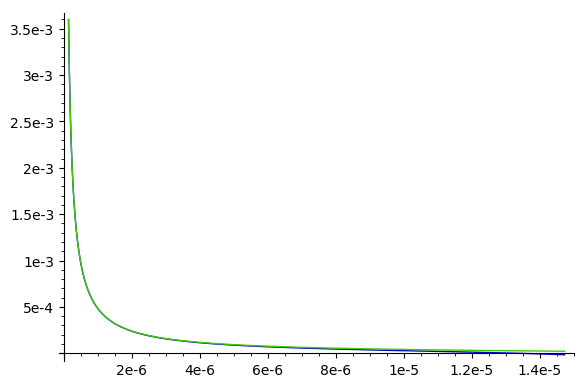

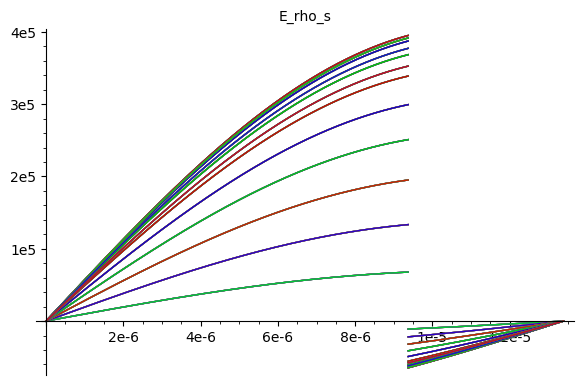

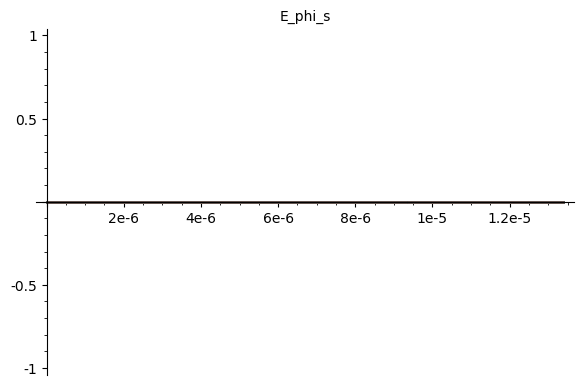

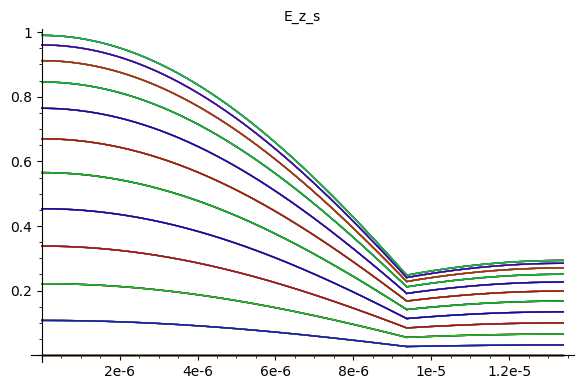

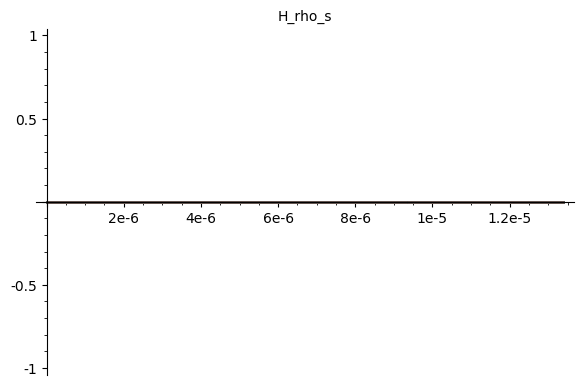

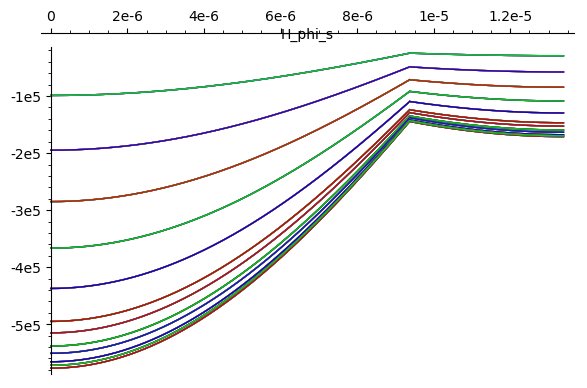

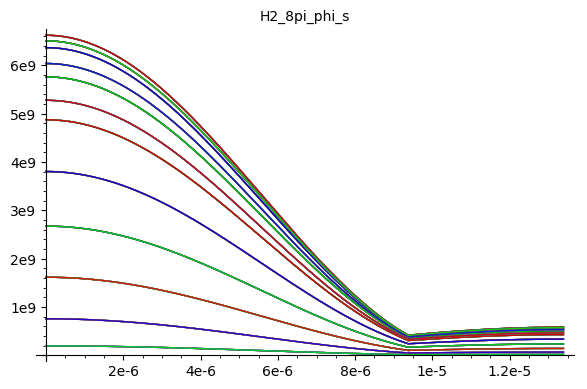

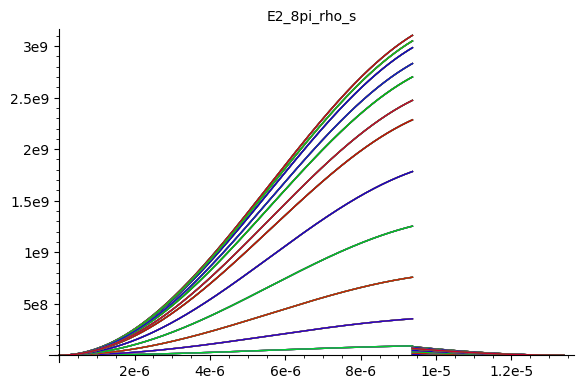

f_surf_(rh,ph) = 1/64*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rh)^2*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)^2*cos(m*ph)^2*cos(0.000013388297293098350290111581140096*k_1)^2/(pi*c^2*kappa^2) - 1/32*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rh)*bessel_J(m - 1, kappa*rh)*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)^2*cos(m*ph)^2*cos(0.000013388297293098350290111581140096*k_1)^2/(pi*c^2*kappa^2) + 1/64*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m - 1, kappa*rh)^2*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)^2*cos(m*ph)^2*cos(0.000013388297293098350290111581140096*k_1)^2/(pi*c^2*kappa^2) + 1/32*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rh)^2*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)*cos(m*ph)^2*cos(0.000013388297293098350290111581140096*k_1)^2*sin(b*g_1*k_1 - b*k_1)*sin(b*g_1*k_1)/(pi*c^2*kappa^2*cos(b*g_1*k_1)) - 1/16*D_z_0^2*epsilon_0^2*omega^2*bessel_J(m + 1, kappa*rh)*bessel_J(m - 1, kappa*rh)*cos(b*g_1*k_0 - b*k_0)^2*cos(b*g_1*k_1 - b*k_1)*cos(m*p

(-1.69832867040885e10*pi^2,
 -1.69832867040885e10*pi^2,
 -1.69832867040885e10*pi^2,
 0,
 0.000013388297293098350290111581140096)

In [286]:
# calc_f_surf(ra = float("NaN"), g1 = 0.5, epsilon0 = 2, epsilon1 = 2, debug = True)
calc_f_surf(ra = a_val/2, g1 = 0.3, epsilon0 = 2, epsilon1 = 2, debug = True)

In [287]:
import numpy as np
fs_a_2 = [(g1, calc_f_surf(ra = rh, g1 = g1, epsilon0 = epsilon_d[0], epsilon1 = epsilon_d[1])) 
          for g1 in np.linspace(0.01, 0.99, 99) 
          for rh in [int(a_val/2)]]
# fs_a_2

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:130: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [291]:
fs_a_2_plt_f = []
fs_a_2_plt_f_H = []
fs_a_2_plt_f_E = []
fs_a_2_plt_f_b = []
for (g1,v) in fs_a_2:
    fs_a_2_plt_f += [(g1, v[0])]
    fs_a_2_plt_f_H += [(g1, v[2])]
    fs_a_2_plt_f_E += [(g1, v[3])]
    fs_a_2_plt_f_b += [(g1, v[4])]
    #print(i, (g1, v))
    #i = i+1

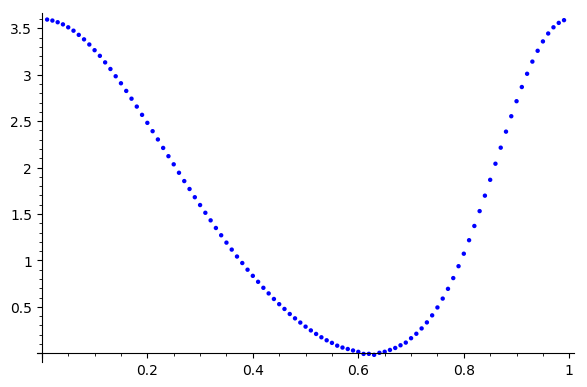

In [292]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a_2_plt_f)
plt.show ()

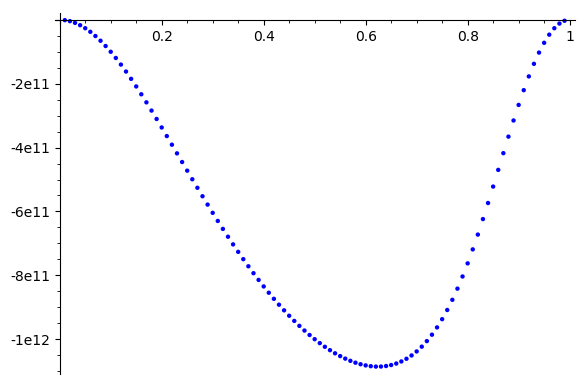

In [293]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a_2_plt_f_H)
plt.show ()

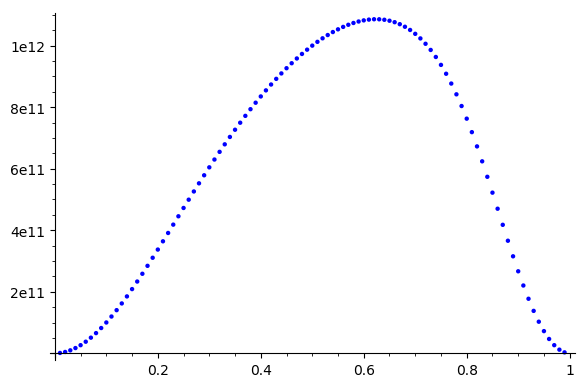

In [294]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a_2_plt_f_E)
plt.show ()

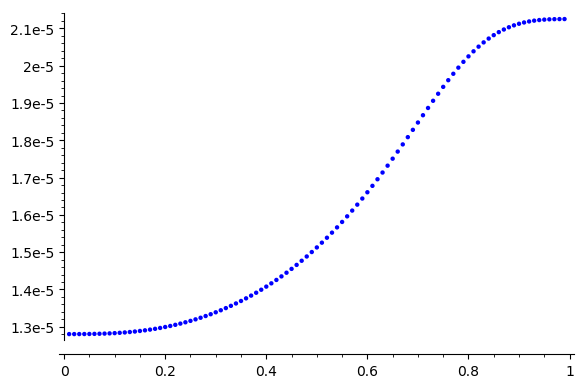

In [295]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a_2_plt_f_b)
plt.show ()

In [ ]:
if False == E_mode:
    fs_a_250 = [(g1, calc_f_surf(ra = rh, g1 = g1, epsilon0 = epsilon_d[0], epsilon1 = epsilon_d[1])) 
                for g1 in np.linspace(0.0001, 0.0250, 250) 
                for rh in [int(a_val/2)]]
    fs_a_250_plt_f   = []
    fs_a_250_plt_f_H = []
    fs_a_250_plt_f_E = []
    fs_a_250_plt_f_b = []
    for (g1,v) in fs_a_2:
        fs_a_250_plt_f   += [(g1, v[0])]
        fs_a_250_plt_f_H += [(g1, v[1])]
        fs_a_250_plt_f_E += [(g1, v[2])]
        fs_a_250_plt_f_b += [(g1, v[3])]

In [ ]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a_plt_f)
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()
if True == E_mode:
    plt += list_plot (fs_a_plt_f[540:630])
else:
    plt += list_plot (fs_a_plt_f[1:100])
plt.show ()

In [ ]:
if False == E_mode:
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_a_250_plt_f)
    plt.show ()

In [ ]:
if False == E_mode:
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_a_250_plt_f[170:190])
    plt.show ()

In [ ]:
if False == E_mode:
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_a_250_plt_f[40:130])
    plt.show ()

In [ ]:
i = 1
for (g1,v) in fs_a:
    print(i, (g1, v))
    i = i+1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ga_linspace = np.linspace(0.01, 0.99, 99)
if True == E_mode:
    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
else:
    ga_linspace = np.linspace(0.001, 0.250, 250)

epsilon0_linspace = np.linspace(1, 2*epsilon_d[0].n(), 12)

ga_list = ga_linspace.tolist()
epsilon0_list = epsilon0_linspace.tolist()

ga_grid,epsilon0_grid = np.meshgrid(ga_linspace, epsilon0_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for iep0 in np.arange(0, len(epsilon0_linspace), 1):
        Ga = ga_list[ig]
        Ep0 = epsilon0_list[iep0]
        u[iep0][ig] = calc_f_surf(ra=a_val/2, epsilon0 = Ep0, epsilon1 = epsilon_d[1], g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,epsilon0_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
ax.plot_surface(ga_grid,epsilon0_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ga_linspace = np.linspace(0.05, 0.95, 18)
#if True == E_mode:
#    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
#else:
#    ga_linspace = np.linspace(0.001, 0.250, 250)

#epsilon1_linspace = np.linspace(1, 2*epsilon_d[1].n(), 2*12)
epsilon1_linspace = np.linspace(1, 4.0, 12)

ga_list = ga_linspace.tolist()
epsilon1_list = epsilon1_linspace.tolist()

ga_grid,epsilon1_grid = np.meshgrid(ga_linspace, epsilon1_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for iep1 in np.arange(0, len(epsilon1_linspace), 1):
        Ga = ga_list[ig]
        Ep1 = epsilon1_list[iep1]
        #u[iep1][ig] = calc_f_surf(ra=a_val/2, epsilon0 = epsilon_d[0], epsilon1 = Ep1, g1=Ga)[0]
        u[iep1][ig] = calc_f_surf(ra=a_val/2, epsilon0 = 2.0, epsilon1 = Ep1, g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,epsilon1_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_1')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_1')
ax.plot_surface(ga_grid,epsilon1_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ga_linspace = np.linspace(0.05, 0.95, 18)
#if True == E_mode:
#    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
#else:
#    ga_linspace = np.linspace(0.001, 0.250, 250)

#epsilon0_linspace = np.linspace(1.0, 2.0*epsilon_d[0].n(), 2*12)
epsilon0_linspace = np.linspace(1.0, 4.0, 12)

ga_list = ga_linspace.tolist()
epsilon0_list = epsilon0_linspace.tolist()

ga_grid,epsilon0_grid = np.meshgrid(ga_linspace, epsilon0_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for iep0 in np.arange(0, len(epsilon0_linspace), 1):
        Ga = ga_list[ig]
        Ep0 = epsilon0_list[iep0]
        #u[iep0][ig] = calc_f_surf(ra=a_val/2, epsilon0 = Ep0, epsilon1 = epsilon_d[1], g1=Ga)[0]
        u[iep0][ig] = calc_f_surf(ra=a_val/2, epsilon0 = Ep0, epsilon1 = 2.0, g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,epsilon0_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
ax.plot_surface(ga_grid,epsilon0_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ga_linspace = np.linspace(0.01, 0.99, 99)
if True == E_mode:
    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
else:
    ga_linspace = np.linspace(0.001, 0.250, 250)

ra_linspace = np.linspace(1, a_val, 12)

ga_list = ga_linspace.tolist()
ra_list = ra_linspace.tolist()

ga_grid,ra_grid = np.meshgrid(ga_linspace, ra_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Ga = ga_list[ig]
        Ra = ra_list[ir]
        u[ir][ig] = calc_f_surf(ra=Ra, epsilon0 = epsilon_d[0], epsilon1 = epsilon_d[1], g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,ra_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('r (cm)')
ax.plot_surface(ga_grid,ra_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [296]:
g_values = []

if 1 < n_layers:
    if True == E_mode:
        #g_values += [g[1] == 0.620]
        #g_values += [g[1] == 0.2]
        #g_values += [g[1] == 0.34]
        g_values += [g[1] == 0.95]
    else:
        g_values += [g[1] == 0.018]
    
#if 2 < n_layers:
#    g_values += [g[2] == 0.05]


In [297]:
disp_eq_b

epsilon_0*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0

In [298]:
disp_eq_b_d

0.0000248246060516187*cos(-245362.362944843*b*(g_1 - 1))/sin(-245362.362944843*b*(g_1 - 1)) + 0.0000149571269038811*cos(147833.806198852*b*g_1)/sin(147833.806198852*b*g_1) == 0

In [299]:
disp_eq_b_s = disp_eq_b_d.subs(g_values)
disp_eq_b_s

0.0000149571269038811*cos(140442.115888910*b)/sin(140442.115888910*b) + 0.0000248246060516187*cos(12268.1181472421*b)/sin(12268.1181472421*b) == 0

In [300]:
disp_eq_brakes = [0]
for operand in disp_eq_b_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print("operand2", operand2)
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, 10*lambda_d)
            operand_denominator_roots.sort()
            print("operand_denominator_roots", operand_denominator_roots)
            #disp_eq_brakes += operand_denominator_roots
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes:
                    disp_eq_brakes += [rt]
            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            print ("")
    else:
        print("operand_denominator", operand_denominator)
        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
        operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, 10*lambda_d)
        operand_denominator_roots.sort()
        print("operand_denominator_roots", operand_denominator_roots)
        #disp_eq_brakes += operand_denominator_roots
        for rt in operand_denominator_roots:
            if rt not in disp_eq_brakes:
                disp_eq_brakes += [rt]
        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        #    M_det_num_factor_operands += (operand,)
        print ("")       

disp_eq_brakes.sort()

0.0000149571269038811*cos(140442.115888910*b)/sin(140442.115888910*b)
(b,)
operand_denominator sin(140442.115888910*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(140442.115888910*b)
operand_denominator_roots [2.2369305915317616e-05, 4.473861182887326e-05, 6.71079177433062e-05, 8.94772234226883e-05, 0.00011184652933713183, 0.00013421583548662382, 0.00015658514164397253, 0.00017895444710446288, 0.0002013237529948719, 0.00022369305893296288, 0.00024606236482375217, 0.00026843167097848677, 0.00029080097688767424, 0.00031317028256705584, 0.000335539588877781, 0.00035790889463098793, 0.0003802782004069098, 0.00040264750645986104, 0.0004250168123742938, 0.00044738611805367597, 0.00046975542420317154, 0.0004921247301169668, 0.0005144940360372908, 0.0005368633419464813, 0.0005592326478609142, 0.000581601953540296, 0.0006039712594547396, 0.0006263405656042548]

0.0000248246060516187*cos(12268.1181472421*b)/sin(12268.1181472421*b)
(b,)
operand_deno

In [301]:
disp_eq_brakes

[0,
 2.2369305915317616e-05,
 4.473861182887326e-05,
 6.71079177433062e-05,
 8.94772234226883e-05,
 0.00011184652933713183,
 0.00013421583548662382,
 0.00015658514164397253,
 0.00017895444710446288,
 0.0002013237529948719,
 0.00022369305893296288,
 0.00024606236482375217,
 0.00025607779578610293,
 0.00026843167097848677,
 0.00029080097688767424,
 0.00031317028256705584,
 0.000335539588877781,
 0.00035790889463098793,
 0.0003802782004069098,
 0.00040264750645986104,
 0.0004250168123742938,
 0.00044738611805367597,
 0.00046975542420317154,
 0.0004921247301169668,
 0.000512155591597441,
 0.0005144940360372908,
 0.0005368633419464813,
 0.0005592326478609142,
 0.000581601953540296,
 0.0006039712594547396,
 0.0006263405656042548]

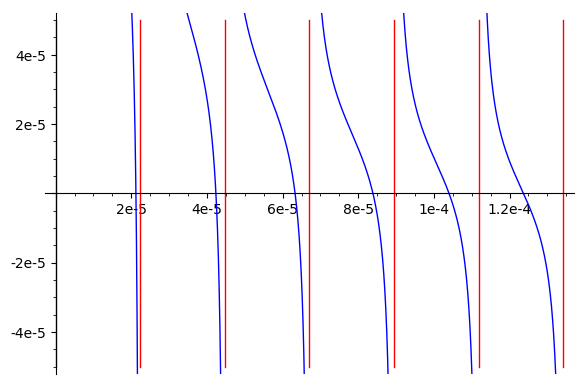

In [302]:
plt = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
plt += plot(disp_eq_b_s.lhs(), xeps, disp_eq_brakes[0])
disp_eq_brakes_plot_range = min(len(disp_eq_brakes), 7)
for i in range(disp_eq_brakes_plot_range-1):
    plt += plot (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)
for i in range(disp_eq_brakes_plot_range):
    plt += line ( [(disp_eq_brakes[i],-ylim), (disp_eq_brakes[i],ylim)], color = 'red')

plt.show()

In [303]:
b_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
        b_lst += find_root_recursive (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
b_lst.sort()

In [304]:
b_lst 

[2.1235350010367378e-05,
 4.23740485665773e-05,
 6.330197462089355e-05,
 8.388065858987361e-05,
 0.0001039884116799358,
 0.00012366434969580245,
 0.00014323962172255278,
 0.00016313234320156363,
 0.00018351022237406825,
 0.00020429982241156064,
 0.000225359816933476,
 0.00024656451569732404,
 0.0002678113862764415,
 0.0002890060597161696,
 0.00031004414509606135,
 0.0003307972227619691,
 0.0003511252086854875,
 0.0003709713131615718,
 0.0003905355786411492,
 0.0004102460423416876,
 0.00043040561718056834,
 0.00045102756573853203,
 0.00047198365569034575,
 0.000493137373592247,
 0.000514377096289453,
 0.0005356070340698601,
 0.0005567294761488633,
 0.0005776276980016349,
 0.0005981616514615256,
 0.0006182178286192177]

In [305]:
b_lst, h_val

([2.1235350010367378e-05,
  4.23740485665773e-05,
  6.330197462089355e-05,
  8.388065858987361e-05,
  0.0001039884116799358,
  0.00012366434969580245,
  0.00014323962172255278,
  0.00016313234320156363,
  0.00018351022237406825,
  0.00020429982241156064,
  0.000225359816933476,
  0.00024656451569732404,
  0.0002678113862764415,
  0.0002890060597161696,
  0.00031004414509606135,
  0.0003307972227619691,
  0.0003511252086854875,
  0.0003709713131615718,
  0.0003905355786411492,
  0.0004102460423416876,
  0.00043040561718056834,
  0.00045102756573853203,
  0.00047198365569034575,
  0.000493137373592247,
  0.000514377096289453,
  0.0005356070340698601,
  0.0005567294761488633,
  0.0005776276980016349,
  0.0005981616514615256,
  0.0006182178286192177],
 0)

In [306]:
b_sol = b_lst[h_val]

In [307]:
b_sol, h_val

(2.1235350010367378e-05, 0)

In [308]:
disp_eq_b_s.subs(b == b_sol)

(8.46560569854517e-12) == 0

In [309]:
b_sol = find_newton_root(f = disp_eq_b_s.lhs(), x = b, xn = b_sol)

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


In [310]:
disp_eq_b_s.subs(b == b_sol)

0.000000000000000 == 0

In [311]:
h_s = []
for i in range(n_layers):
    h_s += [b_s[i].subs(digit_values).subs(b == b_sol).subs(g_values)]
    
h_s

[h_0 == (1.06176750532191e-6), h_1 == 0.0000201735826011162]

In [312]:
h_sol = [0]
for i in range(n_layers):
    h_sol += [h_sol[i] + h_s[i].rhs()]
h_sol

[0, 1.06176750532191e-6, 0.0000212353501064382]

In [313]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda r,p,z, a0, i=i: E_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [314]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda r,p,z, a0, i=i: E_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [315]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda r,p,z, a0, i=i: E_z_s[i](r,p,z)
                .subs(digit_values)
                .subs(epsilon_values)
                .subs(g_values)
                .subs(b == b_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
               ]

In [316]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda r,p,z, a0, i=i: H_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [317]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda r,p,z, a0, i=i: H_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [318]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda r,p,z, a0, i=i: H_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [319]:
display(Math(latex(E_rho_s [1](rho,ph,z))))

<IPython.core.display.Math object>

In [320]:
[E_rho_s [0](rho,ph,z,1) for rho in [1..int(a_val)]]

[-1/2*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*cos(k_1*z)*sin(-b*(g_1 - 1)*k_1 + b*g_1*k_1)/(epsilon_1*cos(-b*(g_1 - 1)*k_1 + b*g_1*k_1)*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*sin(k_1*z)/(epsilon_1*cos(b*g_1*k_1)))*k_1*(bessel_J(m + 1, kappa) - bessel_J(m - 1, kappa))*cos(m*ph)/kappa,
 -1/2*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*cos(k_1*z)*sin(-b*(g_1 - 1)*k_1 + b*g_1*k_1)/(epsilon_1*cos(-b*(g_1 - 1)*k_1 + b*g_1*k_1)*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*sin(k_1*z)/(epsilon_1*cos(b*g_1*k_1)))*k_1*(bessel_J(m + 1, 2*kappa) - bessel_J(m - 1, 2*kappa))*cos(m*ph)/kappa,
 -1/2*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1

In [321]:
if E_mode:
    print([E_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

[2.66881899387971*a0*cos(147833.806198852*z) - 0.00611166326518824*a0*sin(147833.806198852*z), 2.58863323555856*a0*cos(147833.806198852*z) - 0.00592803584247936*a0*sin(147833.806198852*z), 2.45766570489066*a0*cos(147833.806198852*z) - 0.00562811687159712*a0*sin(147833.806198852*z), 2.27983578681884*a0*cos(147833.806198852*z) - 0.00522088184358534*a0*sin(147833.806198852*z), 2.06044656682513*a0*cos(147833.806198852*z) - 0.00471847495885890*a0*sin(147833.806198852*z), 1.80600853158924*a0*cos(147833.806198852*z) - 0.00413580539723482*a0*sin(147833.806198852*z), 1.52402366172596*a0*cos(147833.806198852*z) - 0.00349005288481847*a0*sin(147833.806198852*z), 1.22273745214963*a0*cos(147833.806198852*z) - 0.00280009981434118*a0*sin(147833.806198852*z), 0.910867498065861*a0*cos(147833.806198852*z) - 0.00208590970018927*a0*sin(147833.806198852*z), 0.597318076993665*a0*cos(147833.806198852*z) - 0.00136787356398724*a0*sin(147833.806198852*z), 0.290890611703613*a0*cos(147833.806198852*z) - 0.00066614

In [322]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [323]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

[-34811.5065027609*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -68577.9687973056*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -100289.200803290*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -129003.511844793*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -153878.946204292*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -174201.034429289*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -189406.091412278*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -199099.256405826*pi*(2.69581782460759*I*a0*cos(147833.806198852*z) - 0.00617349127313523*I*a0*sin(147833.806198852*z)),
 -203066.659002870*pi*(2

In [324]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

In [325]:
digit_values

[m == 0, a == 12, mu_0 == 1, sigma_0 == 9, mu_1 == 1, sigma_1 == 9]

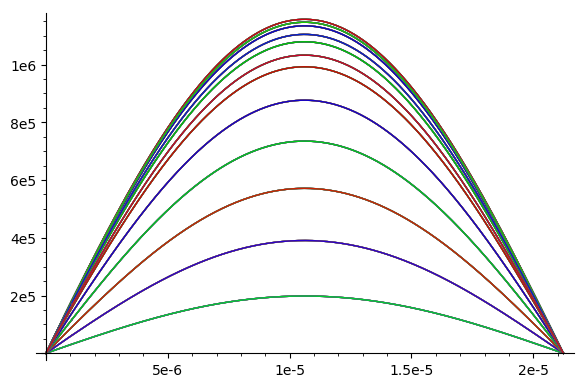

In [326]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

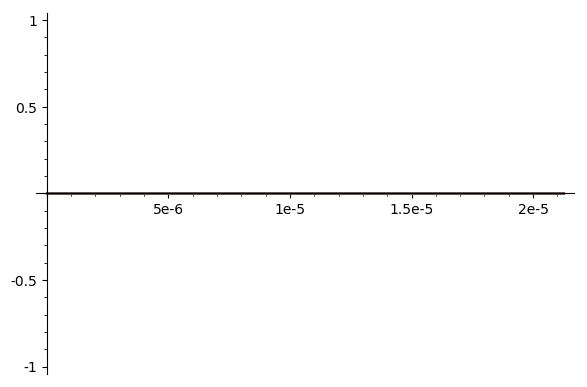

In [327]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

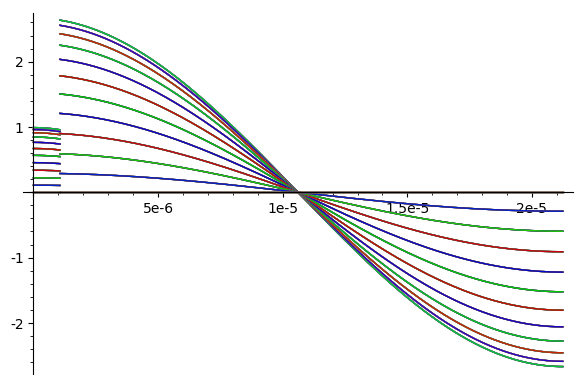

In [328]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

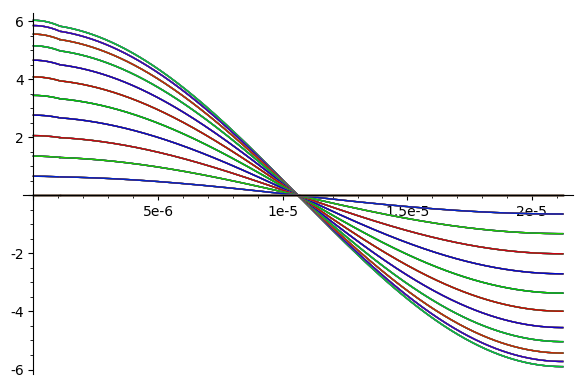

In [329]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

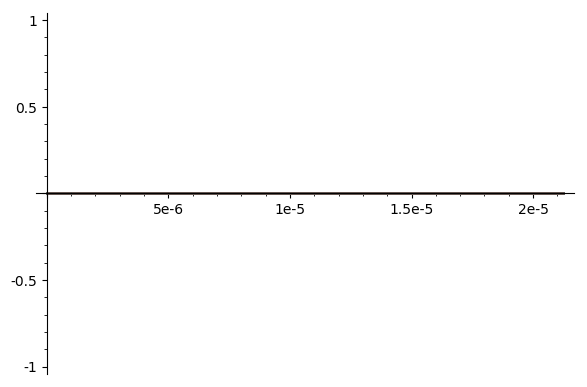

In [330]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

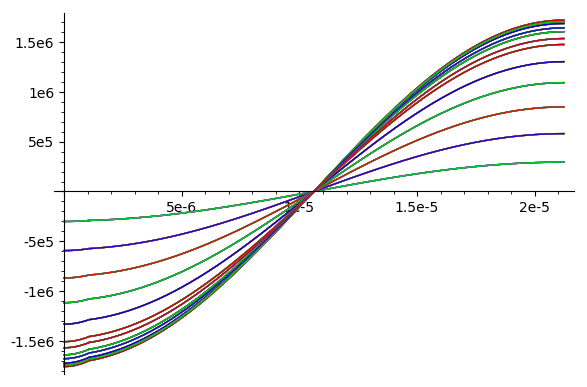

In [331]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

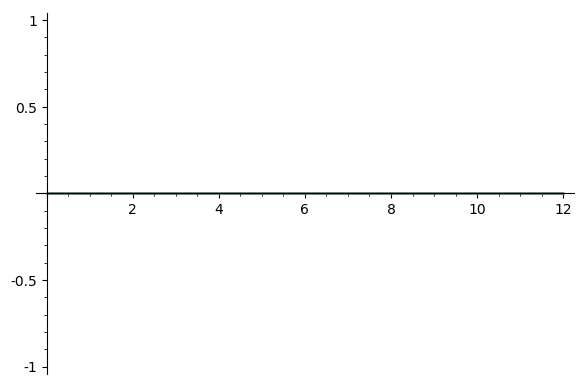

In [332]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

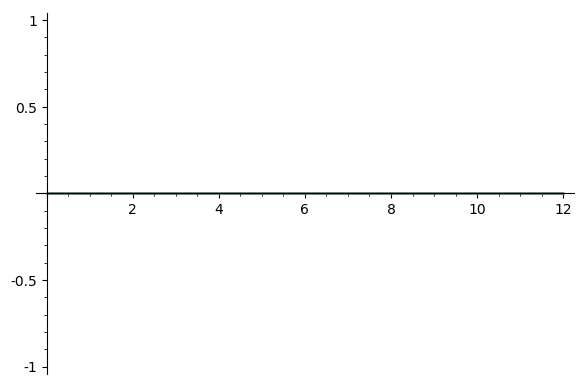

In [333]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

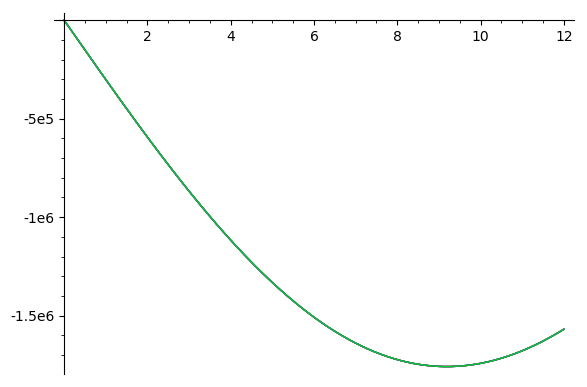

In [334]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

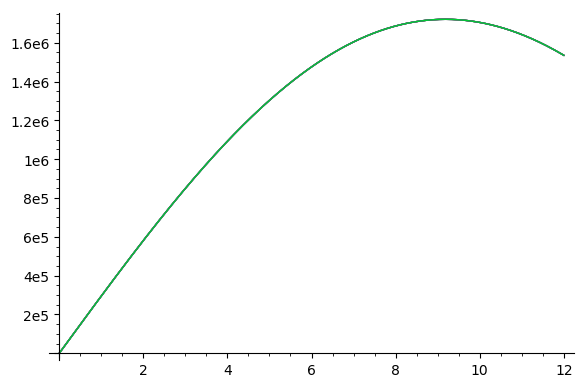

In [335]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

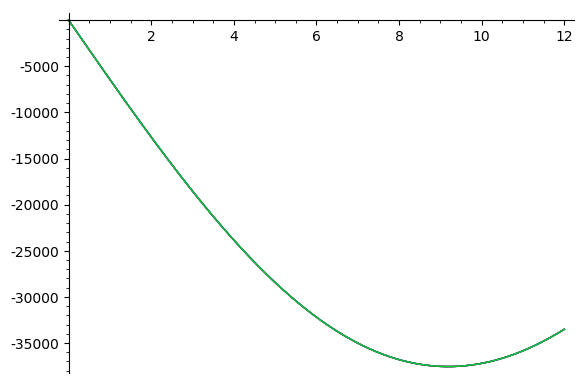

In [336]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() + H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

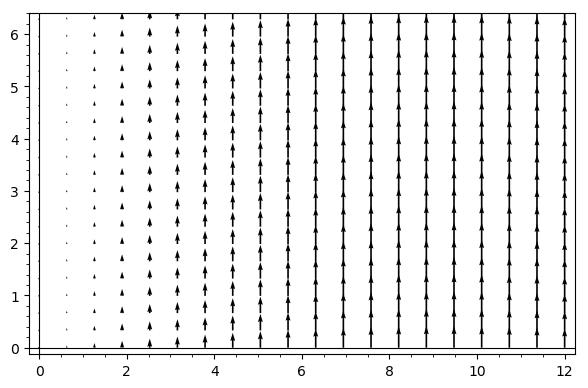

In [339]:
if E_mode:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1).imag_part(),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1).imag_part()),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()
else:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1)),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()

In [340]:
if E_mode:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        name='H1')

    print(H1.display())
    #H1.plot()
else:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1),
        name='H1')

    print(H1.display())
    #H1.plot()


H1 = (470645.819342389*pi*real_part(bessel_J(1, 0.200402129807981*rho)) - 470645.819342389*pi*real_part(bessel_J(-1, 0.200402129807981*rho))) e_phi


In [341]:
def get_integrand_view(f):
    return f(x)

#class my_dummy_integral:
#    f = None
#    a = None
#    b = None
#    def __init__(self, f, a, b):
#        print ("my_dummy_integral ", f, a, b)
#        self.f = f
#        self.a = a
#        self.b = b

def num_int(f, a, b):
    from scipy import integrate
    
    #try:
    #    print ("integrand = ", get_integrand_view(f))
    #except Exception as ex1:
    #    print ("Exception ex1 = ", ex1)
    #print ("a, b = ", a, b)
    
    #to_call_integration = True

    #if type(f) is my_dummy_integral:
    #    to_call_integration = False

    #import inspect
    #stack = inspect.stack()
    #for frame in stack:
    #    func_name = frame[3]
    #    #print ("func_name = ", func_name)
    #    if ('get_integrand_view' == func_name):
    #        to_call_integration = False
    #        break;

    #if not to_call_integration:
    #    return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a, b = ", a, b)

        import inspect
        stack = inspect.stack()
        for frame in stack:
            func_name = frame[3]
            print ("func_name = ", func_name)
            #if ('get_integrand_view' == func_name):
                #to_call_integration = False
                #break;

        
        raise ex

In [342]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda r,p,z, a0, i=i: E2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [343]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda r,p,z, a0, i=i: E2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [344]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda r,p,z, a0, i=i: E2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [345]:
E2_8pi_rho_sol[0](r,p,z, a0)

1/64*(1.22435007641855e6*a0*bessel_J(1, 0.200402129807981*r)*sin(245362.362944843*z) - 1.22435007641855e6*a0*bessel_J(-1, 0.200402129807981*r)*sin(245362.362944843*z))^2/pi

In [346]:
E2_8pi_phi_sol[0](r,p,z, a0)

0

In [347]:
E2_8pi_z_sol[0](r,p,z, a0)

1/16*a0^2*bessel_J(0, 0.200402129807981*r)^2*cos(245362.362944843*z)^2/pi

In [348]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

1/16*a0^2*bessel_J(0, 0.200402129807981*rh)^2*cos(245362.362944843*z)^2/pi


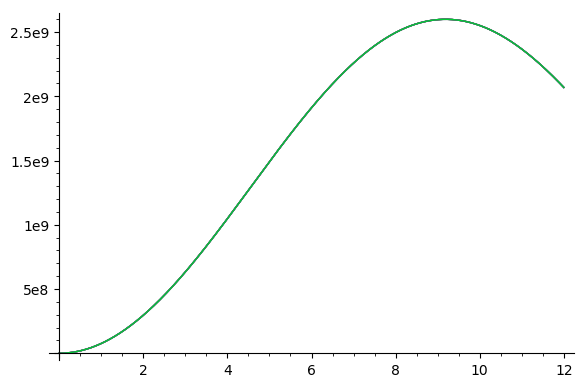

In [349]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon_d[i]-epsilon_d[i+1]) * 
                (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

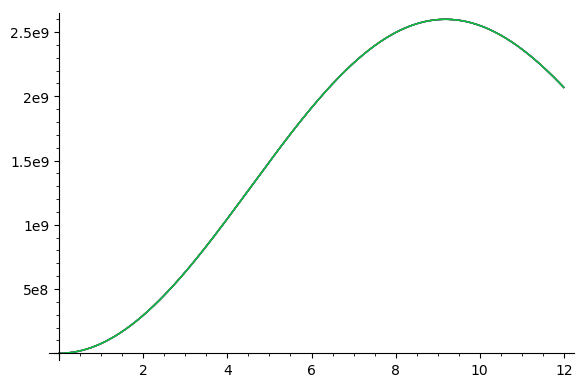

In [350]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [351]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_rho_sol[i](r,p,z, a0) * r]

In [352]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_phi_sol[i](r,p,z, a0) * r]

In [353]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_z_sol[i](r,p,z, a0) * r]

In [354]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

1/64*(1.22435007641855e6*bessel_J(1, 0.200402129807981*rh)*sin(245362.362944843*z) - 1.22435007641855e6*bessel_J(-1, 0.200402129807981*rh)*sin(245362.362944843*z))^2*rh/pi

In [355]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

0

In [356]:
print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

1/16*rh*bessel_J(0, 0.200402129807981*rh)^2*cos(245362.362944843*z)^2/pi


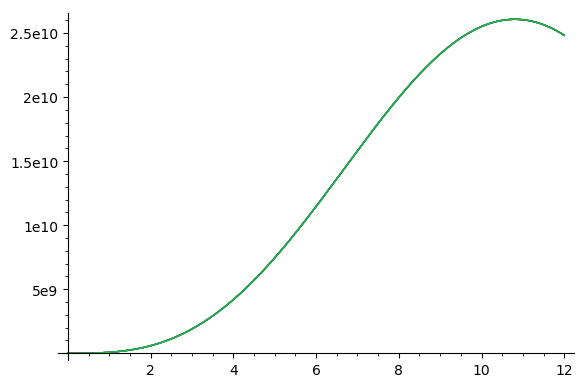

In [357]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon_d[i]-epsilon_d[i+1]) * 
                (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

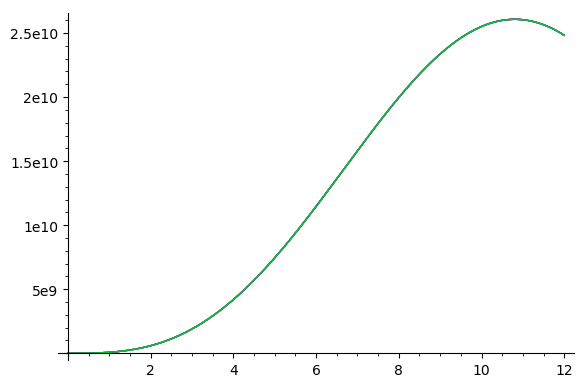

In [358]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [359]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [360]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [361]:
E2_8pi_rho_sol_rh[1](r,p,z, a0)

1/64*(-4554.09687171215*a0*bessel_J(1, 0.200402129807981*r)*cos(147833.806198852*z) + 4554.09687171215*a0*bessel_J(-1, 0.200402129807981*r)*cos(147833.806198852*z) - 1.98866653868555e6*a0*bessel_J(1, 0.200402129807981*r)*sin(147833.806198852*z) + 1.98866653868555e6*a0*bessel_J(-1, 0.200402129807981*r)*sin(147833.806198852*z))^2*r/pi

In [362]:
if 1 < n_layers:
    print([E2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [363]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [364]:
[E2_8pi_phi_sol_rh_int_ph [0](r,h_sol[1], 1) for r in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [365]:
if 1 < n_layers:
    print([E2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[1], 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [366]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [367]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]])

[0.1225087677698295, 0.23051541523366362, 0.31167057710130047, 0.3575988029838375, 0.3651082524965359, 0.33660439138192005, 0.27964714616607905, 0.20572418403295933, 0.12843454537859025, 0.06136775677932675, 0.016009620118422305, 2.4000954145859053e-31]


In [368]:
if E_mode:
    if 1 < n_layers:
        print([E2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.8903290218151199, 1.6752642924618284, 2.265057147260709, 2.5988392362335557, 2.6534139492171387, 2.4462629407945413, 2.0323277642235116, 1.495094717448347, 0.9333944438085426, 0.4459884452268718, 0.1163494636273447, 1.7442625875937315e-30]


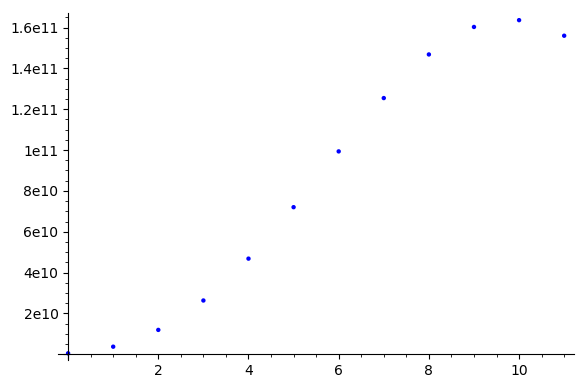

In [369]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)])
            for rho in [1..int(a_val)] ])
plt.show ()

In [370]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [371]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [372]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [373]:
f_dielectric_surf_rho = []
for i in range(n_layers - 1):
    f_dielectric_surf_rho += [(epsilon_d[i]-epsilon_d[i+1])*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, h_sol[i+1], 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [374]:
f_dielectric_surf_phi = []
for i in range(n_layers - 1):
    f_dielectric_surf_phi += [(epsilon_d[i]-epsilon_d[i+1])*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [375]:
f_dielectric_surf_z = []
for i in range(n_layers - 1):
    epsilon_d[i]*E_z_sol[i](rh,ph,z,1)
    f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1])*E2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i+1]/epsilon_d[i])*E2_8pi_z_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [376]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol[1], 1))

2.4256271154772535
2.264691803210183


In [377]:
if E_mode:
    if 1 < n_layers:
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[1], 1))
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[2], 1))

17.184854347647086
17.62817679358738


In [378]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [379]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [380]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [381]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda r,p,z, a0, i=i: H2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [382]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda r,p,z, a0, i=i: H2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [383]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda r,p,z, a0, i=i: H2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [384]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

0

In [385]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

1/64*(961835.706213919*pi*a0*bessel_J(1, 0.200402129807981*rh)*cos(245362.362944843*z) - 961835.706213919*pi*a0*bessel_J(-1, 0.200402129807981*rh)*cos(245362.362944843*z))^2/pi

In [386]:
H2_8pi_z_sol[0](rh,ph,z, a0)

0

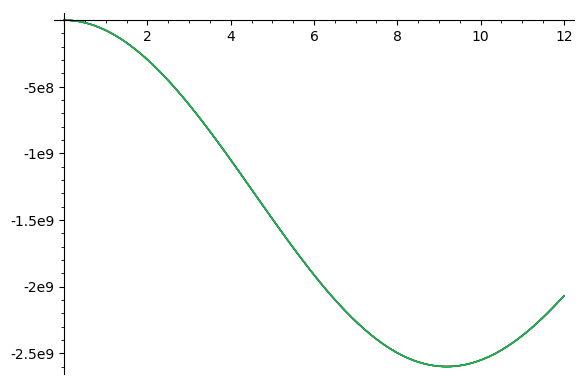

In [387]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([- H2_8pi_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([- H2_8pi_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

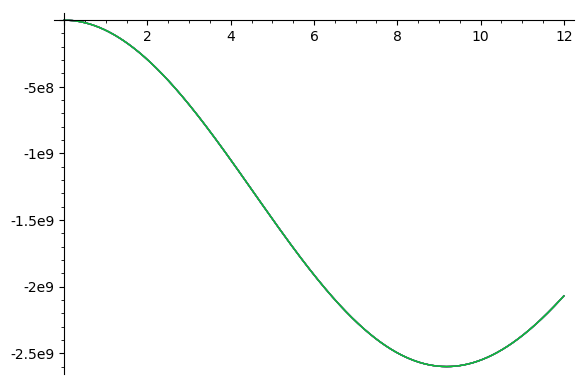

In [388]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) ))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

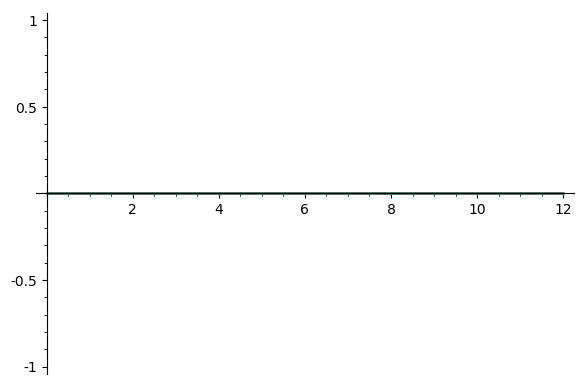

In [389]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(1.0-epsilon_d[0]) * 
            (E2_8pi_rho_sol[0](rh,ph,h_sol[0],1) + 
             E2_8pi_phi_sol[0](rh,ph,h_sol[0],1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))

plt += plot ([(epsilon_d[n_layers - 1] - 1.0) * 
            (E2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             E2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

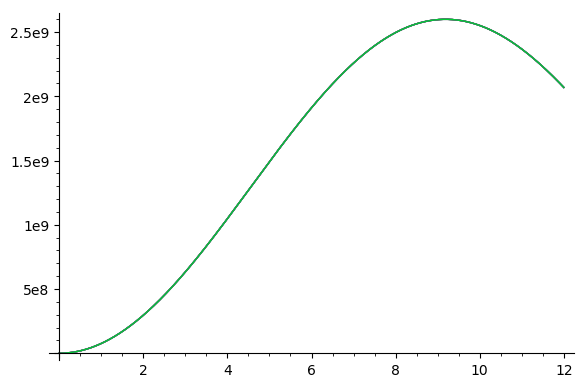

In [390]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

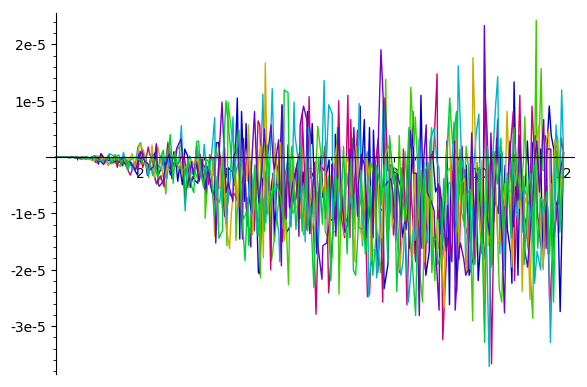

In [391]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [392]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_rho_sol[i](r,p,z, a0) * r]

In [393]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_phi_sol[i](r,p,z, a0) * r]

In [394]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_z_sol[i](r,p,z, a0) * r]

In [395]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

0

In [396]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

1/64*(961835.706213919*pi*bessel_J(1, 0.200402129807981*rh)*cos(245362.362944843*z) - 961835.706213919*pi*bessel_J(-1, 0.200402129807981*rh)*cos(245362.362944843*z))^2*rh/pi

In [397]:
H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,z,1)

1/64*(941289.170526007*pi*bessel_J(1, 0.200402129807981*rh)*cos(147833.806198852*z) - 941289.170526007*pi*bessel_J(-1, 0.200402129807981*rh)*cos(147833.806198852*z) - 2155.57610261920*pi*bessel_J(1, 0.200402129807981*rh)*sin(147833.806198852*z) + 2155.57610261920*pi*bessel_J(-1, 0.200402129807981*rh)*sin(147833.806198852*z))^2*rh/pi

In [398]:
H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,0,1) - H2_8pi_phi_sol_rh[0](rh,ph,b_sol,1)

1/64*(941289.170526007*pi*bessel_J(1, 0.200402129807981*rh) - 941289.170526007*pi*bessel_J(-1, 0.200402129807981*rh))^2*rh/pi - 1/64*(459411.360507537*pi*bessel_J(1, 0.200402129807981*rh) - 459411.360507537*pi*bessel_J(-1, 0.200402129807981*rh))^2*rh/pi

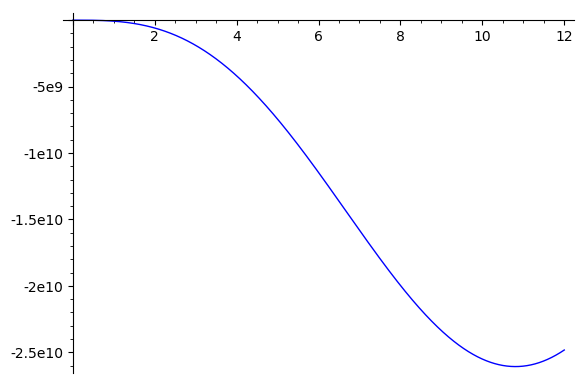

In [399]:
plot(H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) - H2_8pi_phi_sol_rh[0](rh,ph,0,1),(rh,0,a_val))

In [400]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

0

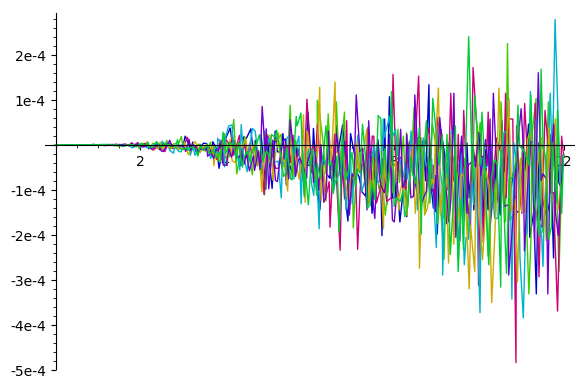

In [401]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol_rh[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol_rh  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol_rh[0](rh,ph,0,1) + 
             H2_8pi_phi_sol_rh[0](rh,ph,0,1) +
             H2_8pi_z_sol_rh  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [402]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [403]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [404]:
if 1 < n_layers:
    print([H2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [405]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [406]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[11344677177.914324,
 88053320260.79947,
 282472453016.89954,
 623174341545.1603,
 1108344874135.7588,
 1704508672671.1685,
 2350890656445.46,
 2968764641215.8896,
 3474291567885.1606,
 3792742761658.132,
 3871738705528.2764,
 3691257348349.7534]

In [407]:
if 1 < n_layers:
    print([H2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[10865225729.617817, 84331989872.61134, 270534534944.93555, 596837599132.012, 1061503739145.0764, 1632472321267.788, 2251536755726.8213, 2843298003024.2407, 3327460230342.1436, 3632452963934.0337, 3708110362413.7617, 3535256551328.681]


In [408]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [409]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [410]:
if 1 < n_layers:
    print([H2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


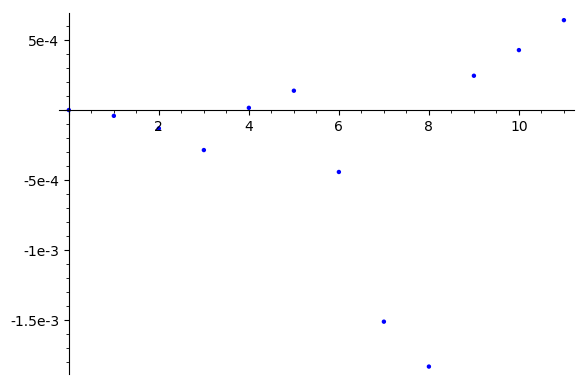

In [411]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([
    ((H2_8pi_rho_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) + 
     H2_8pi_phi_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) +
     H2_8pi_z_sol_rh_int_ph  [n_layers - 1](rho,b_sol,1) )
    -
    (H2_8pi_rho_sol_rh_int_ph[0](rho,0,1) + 
     H2_8pi_phi_sol_rh_int_ph[0](rho,0,1) +
     H2_8pi_z_sol_rh_int_ph  [0](rho,0,1) )
    +
    sum([(epsilon_d[i]-epsilon_d[i+1]) * 
    (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
     E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)]))
    for rho in [1..int(a_val)] ])
plt.show ()

In [412]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [413]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [414]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [415]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_rho

0.0

In [416]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_phi

22147544090098.51

In [417]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_z

0.0

In [418]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_rho

0.0

In [419]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_phi

21211539307972.066

In [420]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_z

0.0

In [421]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [422]:
surf_f_z

-936004782126.4453

In [423]:
f_dielectric_surf_rho

[9.36004782126437e11]

In [424]:
f_dielectric_surf_phi

[0.000000000000000]

In [425]:
f_dielectric_surf_z

[24.2043250770759]

In [426]:
f_dielectric_surf = 0
print(f_dielectric_surf)
for i in range(n_layers - 1):
    f_dielectric_surf += f_dielectric_surf_rho[i] + f_dielectric_surf_phi[i] + f_dielectric_surf_z[i]
    print(f_dielectric_surf)

0
9.36004782150641e11


In [427]:
sum_surf_f_z = surf_f_z + f_dielectric_surf

In [428]:
sum_surf_f_z

24.1961669921875

In [429]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [430]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [431]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [432]:
ED_8pi_rho = []
for i in range(n_layers):
    ED_8pi_rho += [epsilon_d[i] * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i], h_sol[i+1], 1)]

In [433]:
#ED_8pi_rho_0 + ED_8pi_rho_1
sum(ED_8pi_rho)

2.25714141481474e8

In [434]:
ED_8pi_phi = []
for i in range(n_layers):
    ED_8pi_phi += [epsilon_d[i] * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [435]:
#ED_8pi_phi_0 + ED_8pi_phi_1
sum(ED_8pi_phi)

0.000000000000000

In [436]:
ED_8pi_z = []
for i in range(n_layers):
    ED_8pi_z += [epsilon_d[i] * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [437]:
#ED_8pi_z_0 + ED_8pi_z_1
sum(ED_8pi_z)

0.000387866879847048

In [438]:
HB_8pi_rho = []
for i in range(n_layers):
    HB_8pi_rho += [mu_d[i] * H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [439]:
#H2_8pi_rho_0 + H2_8pi_rho_1
sum(HB_8pi_rho)

0.0

In [440]:
HB_8pi_phi = []
for i in range(n_layers):
    HB_8pi_phi += [mu_d[i] * H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [441]:
#H2_8pi_phi_0 + H2_8pi_phi_1
sum(HB_8pi_phi)

225714141.4818617

In [442]:
HB_8pi_z = []
for i in range(n_layers):
    HB_8pi_z += [mu_d[i] * H2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [443]:
#H2_8pi_z_0 + H2_8pi_z_1
sum(HB_8pi_z)

0.0

In [444]:
field_energy = sum(HB_8pi_rho) + sum(HB_8pi_phi) + sum(HB_8pi_z) \
             + sum(ED_8pi_rho) + sum(ED_8pi_phi) + sum(ED_8pi_z)
field_energy

4.51428282963723e8

In [445]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [446]:
# Abraham force
# Minkovsky form without dissipation
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [447]:
Abraham_Minkovsky_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z += [lambda r,p,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re(E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im(E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re(E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im(E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [448]:
print(Abraham_Minkovsky_f_z[0](rh, ph, z))

1/32*((D_z_0*k_0*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa - D_z_0*k_0*omega*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa)*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa)) - (D_z_0*epsilon_0*omega^2*bessel_J(m + 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega^2*bessel_J(m - 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa))*(D_z_0*k_0*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa))*(epsilon_0*mu_0 - 1)/(pi*c)


In [449]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [450]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [451]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [452]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [453]:
Abraham_Minkovsky_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z_s += [lambda r,p,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re(E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im(E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re(E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im(E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [454]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [455]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [456]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [457]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [458]:
# Abraham force
# Abraham form with dissipation
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E x H]).diff(t)
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (mu) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re((epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (mu) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(H_ph) + Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(H_ph) 
#        - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(H_rh) - Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(H_rh)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(-I*omega * H_ph) + Im((epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(-I*omega * H_ph)
#        - Re((epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(-I*omega * H_rh) - Im((epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(-I*omega * H_rh)) 
#       )


In [459]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [460]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [461]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [462]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [463]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [464]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [465]:
calc_Abraham_force = False

In [466]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda r,p,z, a0, i=i: Abraham_f_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [467]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [1..int(a_val)]]

In [468]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [1..int(a_val)]]

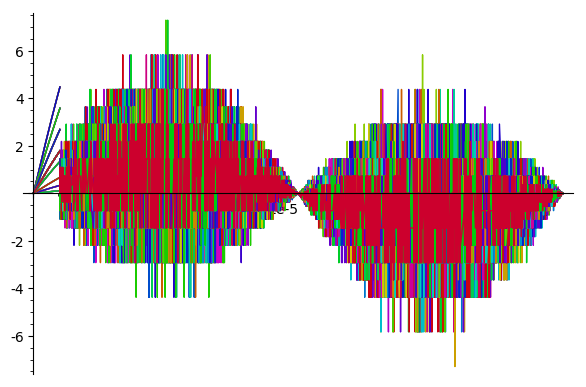

In [469]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

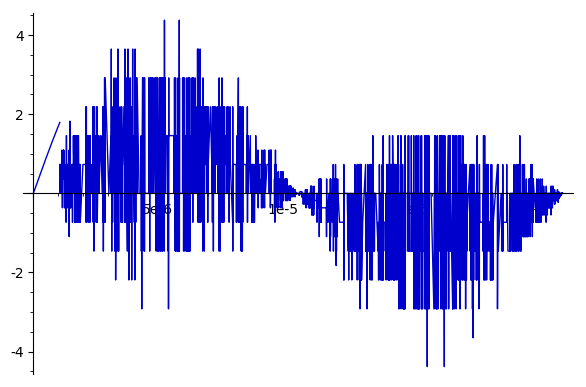

In [470]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [471]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[2.29223500799343*pi*cos(245362.362944843*z)*sin(245362.362944843*z)]

In [472]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[2.29223500799343*pi*cos(245362.362944843*z)*sin(245362.362944843*z)]

In [473]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[-1/959335865600*((977335.834208510*pi*cos(147833.806198852*z) - 2238.12387778348*pi*sin(147833.806198852*z))*(-9.91924419805179e18*pi*cos(147833.806198852*z) - 4.33149965435413e21*pi*sin(147833.806198852*z)) - (9.27208582369777e20*pi^2*cos(147833.806198852*z) - 2.12333119819367e18*pi^2*sin(147833.806198852*z))*(-10455.5037424736*cos(147833.806198852*z) - 4.56567153125615e6*sin(147833.806198852*z)))/pi]

In [474]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[-1/959335865600*((977335.834208510*pi*cos(147833.806198852*z) - 2238.12387778348*pi*sin(147833.806198852*z))*(-9.91924419805179e18*pi*cos(147833.806198852*z) - 4.33149965435413e21*pi*sin(147833.806198852*z)) - (9.27208582369777e20*pi^2*cos(147833.806198852*z) - 2.12333119819367e18*pi^2*sin(147833.806198852*z))*(-10455.5037424736*cos(147833.806198852*z) - 4.56567153125615e6*sin(147833.806198852*z)))/pi]

In [475]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda r,p,z, a0, i=i: Abraham_f_z_sol[i](r,p,z, a0) * r]

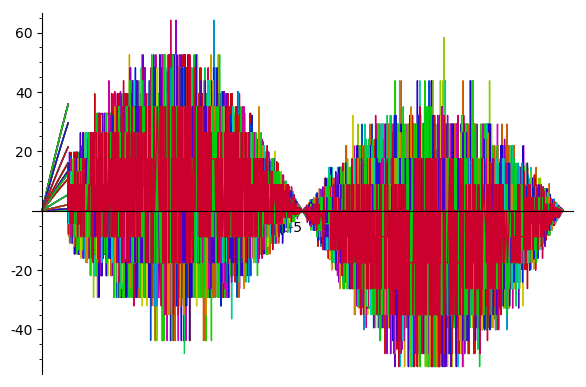

In [476]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [477]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda r,z,a0, i=i: 
                                  num_int(
                                      lambda p : Abraham_f_z_sol_rh[i](r,p,z,a0), 
                                      0, 2*pi)
                                 ]

In [478]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : Abraham_f_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [479]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [480]:
if calc_Abraham_force:
    Abraham_f_z = []
    for i in range(n_layers):
        Abraham_f_z += [Abraham_f_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [481]:
if calc_Abraham_force:
    print(Abraham_f_z)

In [482]:
if calc_Abraham_force:
    print(sum(Abraham_f_z))

In [483]:
#Abraham_f_z_0 + Abraham_f_z_1

In [484]:
sum_f_z = sum_surf_f_z
if calc_Abraham_force:
    sum_f_z += sum(Abraham_f_z)

In [485]:
sum_f_z

24.1961669921875

In [486]:
sum_f_z / (field_energy)

5.35991383467037e-8

In [487]:
S = pi.n() * a_val^2
S

452.389342116930

In [488]:
V = b_sol * S
V

0.00960664606427424

In [489]:
h_sol

[0, 1.06176750532191e-6, 0.0000212353501064382]

In [490]:
# мкм
b_sol*10*1000 

0.21235350106438156660365948469327

In [491]:
field_energy

4.51428282963723e8

In [492]:
# эрг / куб см
(field_energy)/V

4.69912475117118e10

In [493]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

https://iopscience.iop.org/article/10.1088/1367-2630/18/5/053042

A uniform electric field $E={10}^{6}$ V m−1 along the $z$ direction is applied. This electric field corresponds to an average laser intensity of ${I}_{0}=1.33\ \mathrm{mW}\;\mu {{\rm{m}}}^{-2}$ as used under typical experiment conditions

In [494]:
# 1.33 мВт / 1 мкм^2
# 1.33 * 10^4 эрг в сек / 0.0001 см
w = (1.33 * 10^4 /(0.0001^2*c)).subs(c_value)
w # эрг в куб см

44.3640246613542

In [495]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

2.37787349544050e-6

In [496]:
# Ньютон
F_z / 10^5

2.37787349544050e-11

In [497]:
# gramm
F_z / 10^5 *101

2.40165223039490e-9

In [498]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

0.0896780410100001

In [499]:
omega_value[0].rhs().n()

2.98046134067856e15

In [500]:
# число ячеек в #сантиметре
nLayers_per_sm = 1/(15e-06 + b_sol)
nLayers_per_sm

27597.3599554741

In [501]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

2.47487717785474

In [502]:
# кг / см толщины
1.0/(15e-06 + b_sol) * F_z / 10^5 *101/1000

6.62792610900753e-8